In [1]:
# Import basic libraries
import os, sys
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
# Path for zip file
zipfile_path = r"C:\Users\91866\OneDrive\Desktop\ML practice models\E-commerce dataset\online+retail+ii.zip"

# Path to extract the file
extracted_folder = r'/Users/91866/OneDrive/Desktop/ML practice models/E-commerce dataset'

In [3]:
# Extract the file into the folder
with zipfile.ZipFile(zipfile_path,'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

In [4]:
# Read the excel sheet and update it into a dataframe

all_sheets_dict = pd.read_excel('online_retail_II.xlsx',sheet_name=None)

df = pd.DataFrame()
for sheet in all_sheets_dict.keys():
    df = pd.concat([df,all_sheets_dict[sheet]],ignore_index=True)
    

In [5]:
# There are 53628 unique invoices. Where customer might have bought multiple items under single invoice
df['Invoice'].nunique()

53628

# EDA 

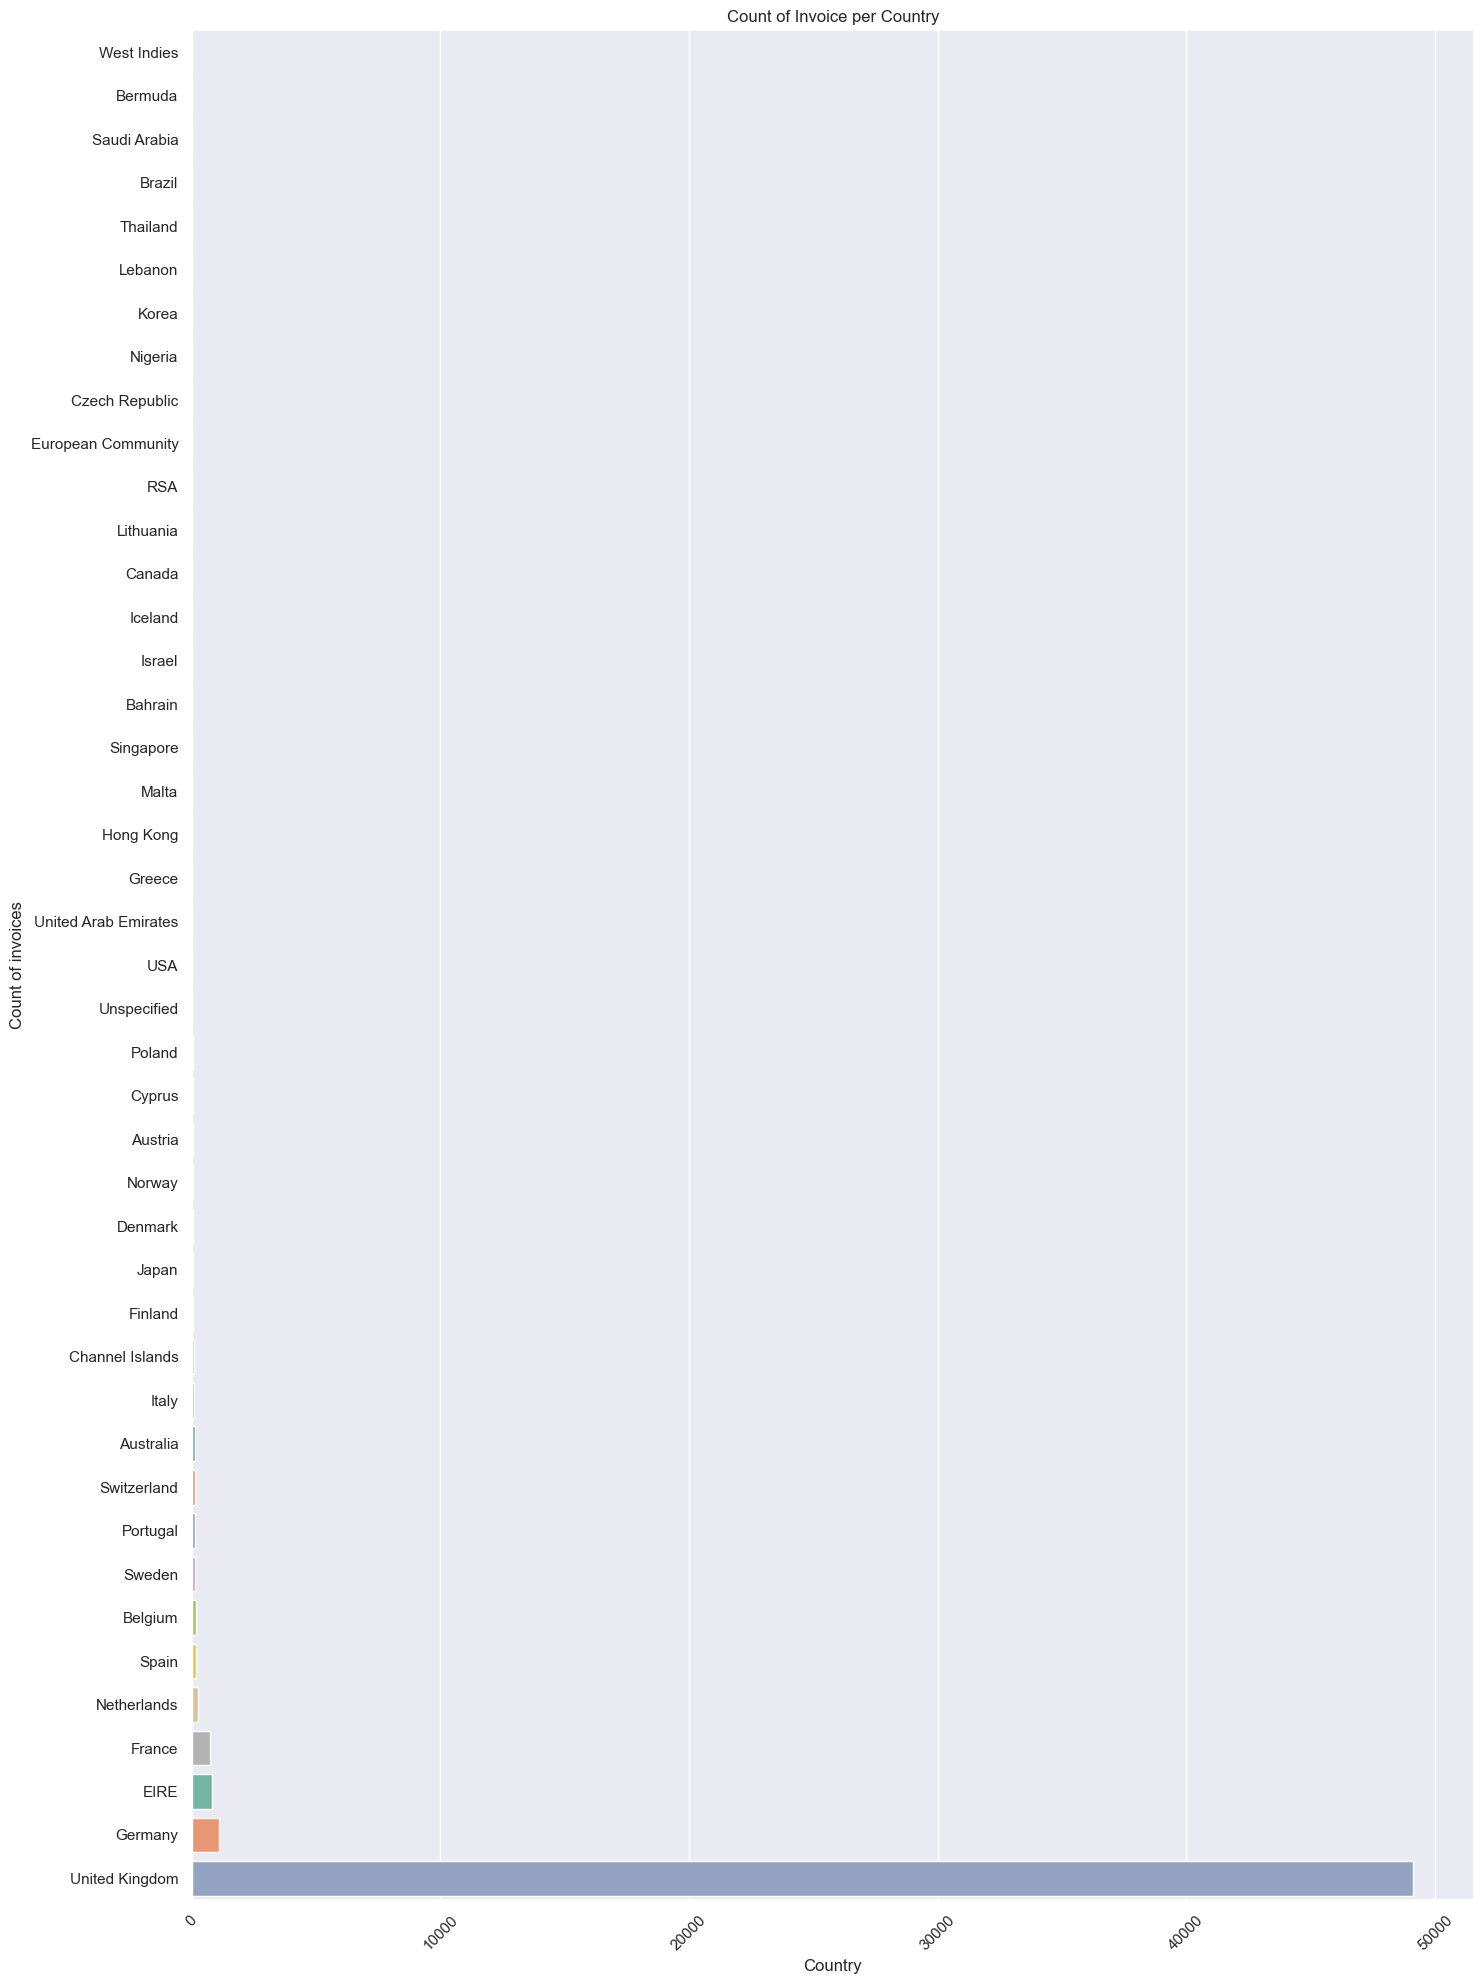

In [6]:
# There are high orders from the customer from UK region as compared to other region
temp = df.groupby('Country')['Invoice'].nunique().reset_index()
temp = temp.sort_values(by='Invoice')

plt.figure(figsize=(15,20))
sns.barplot(temp,y='Country',x='Invoice',palette='Set2')
plt.xlabel('Country')
plt.ylabel('Count of invoices')
plt.title('Count of Invoice per Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

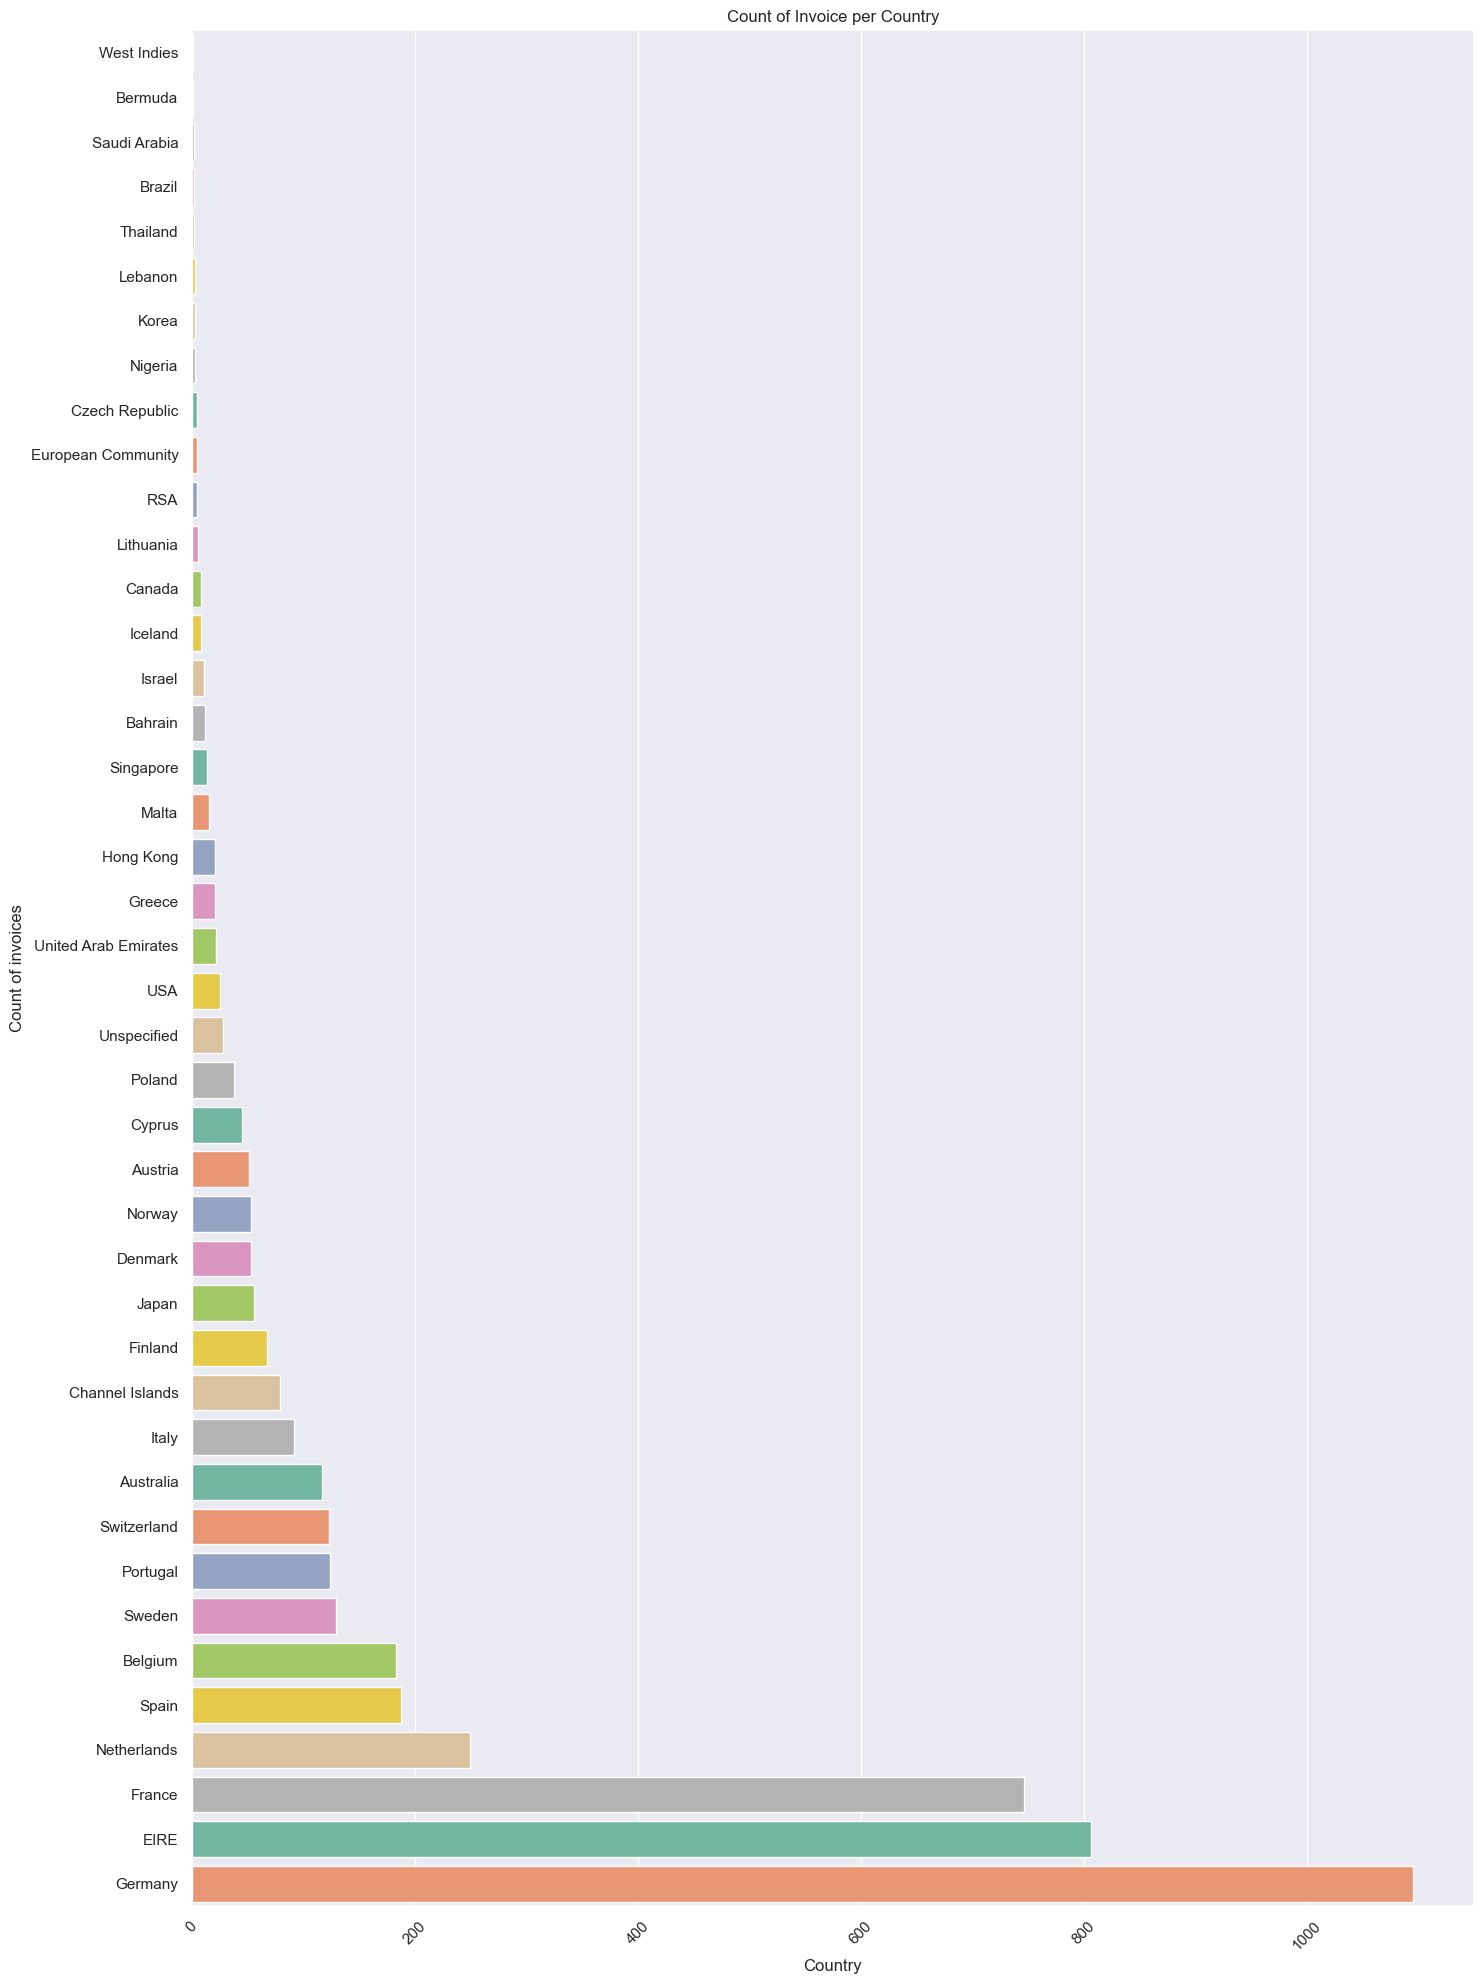

In [7]:
# Excluding UK region and plotting rest of the region
temp = df.groupby('Country')['Invoice'].nunique().reset_index()
temp = temp.sort_values(by='Invoice')
temp = temp[temp['Country']!='United Kingdom']

plt.figure(figsize=(15,20))
sns.barplot(temp,y='Country',x='Invoice',palette='Set2')
plt.xlabel('Country')
plt.ylabel('Count of invoices')
plt.title('Count of Invoice per Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

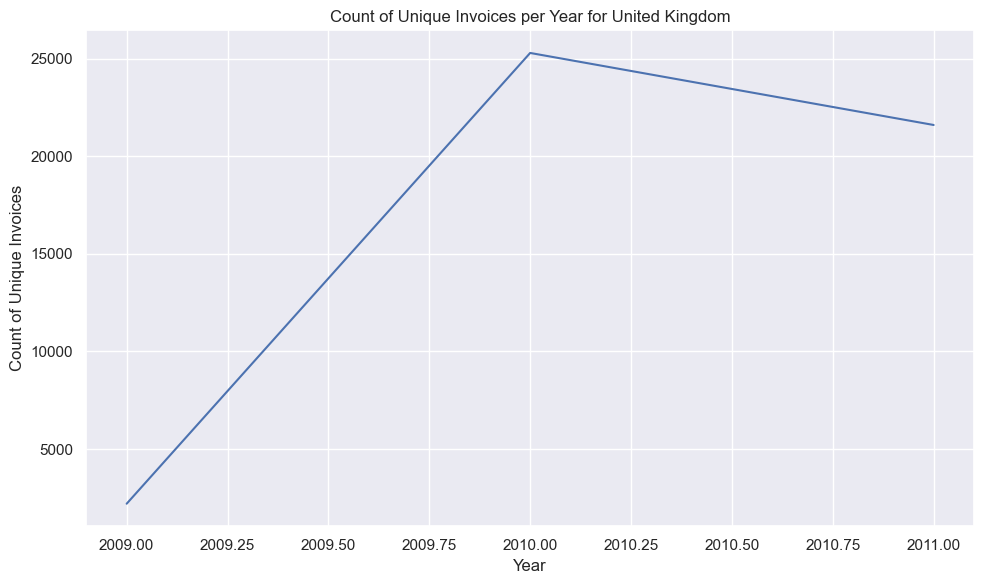

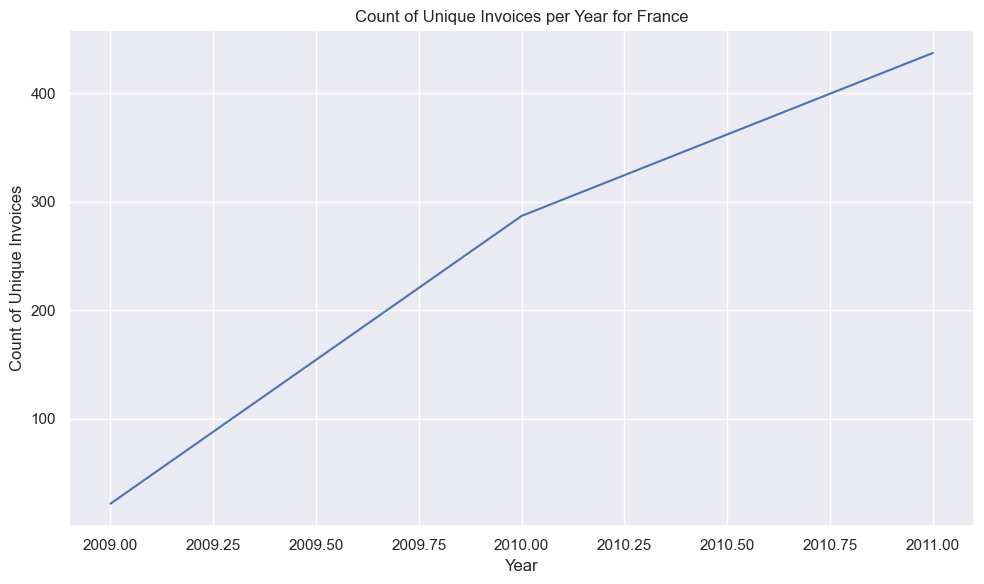

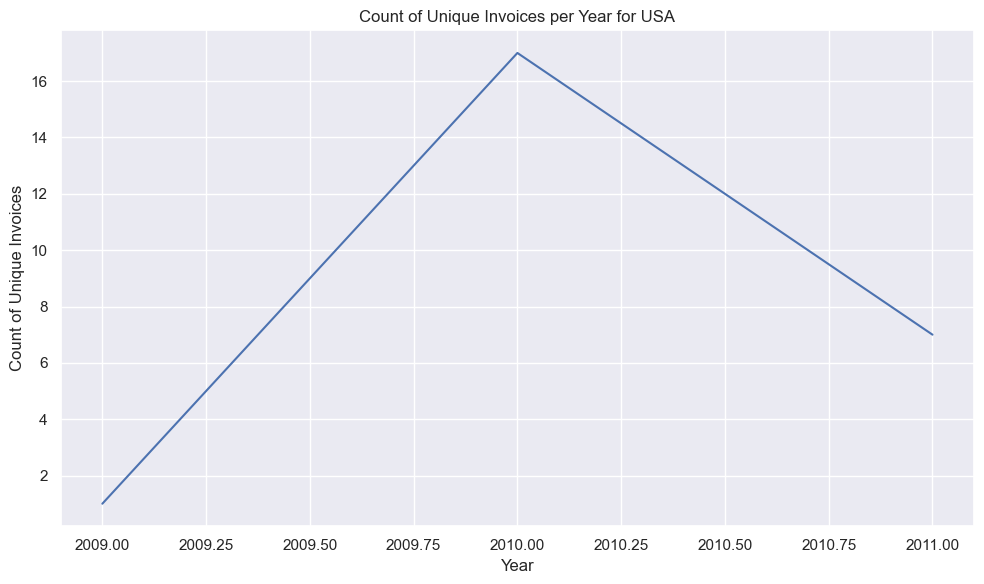

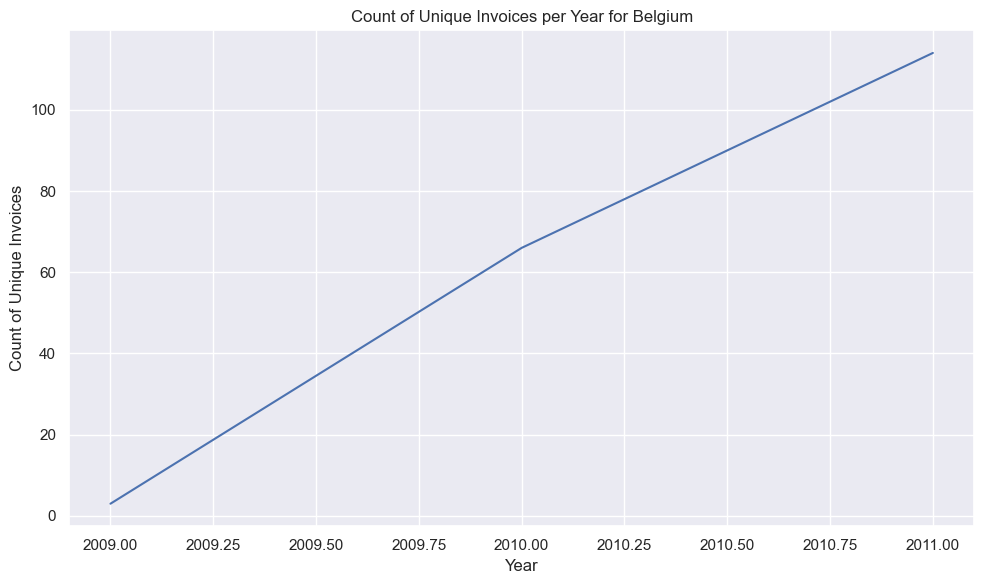

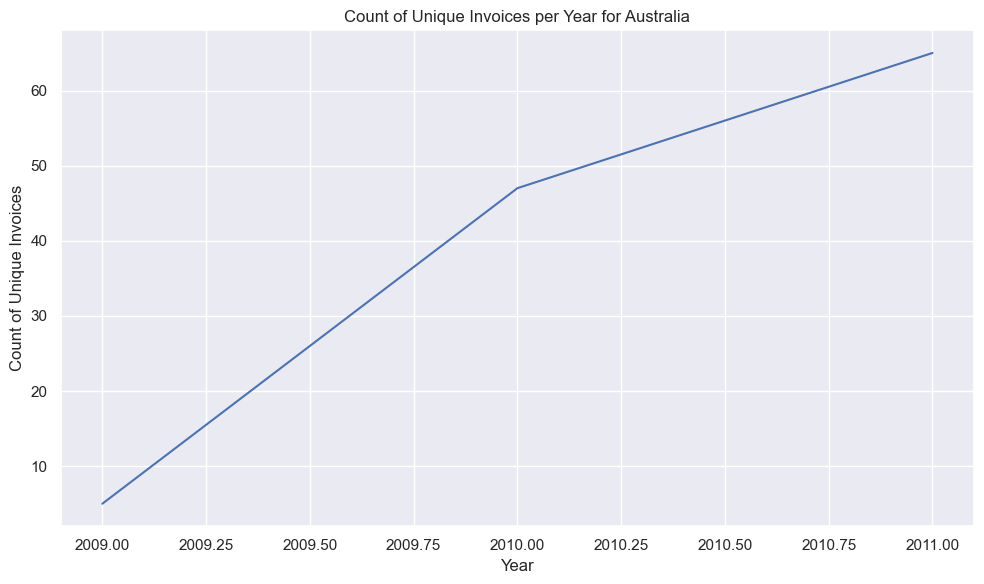

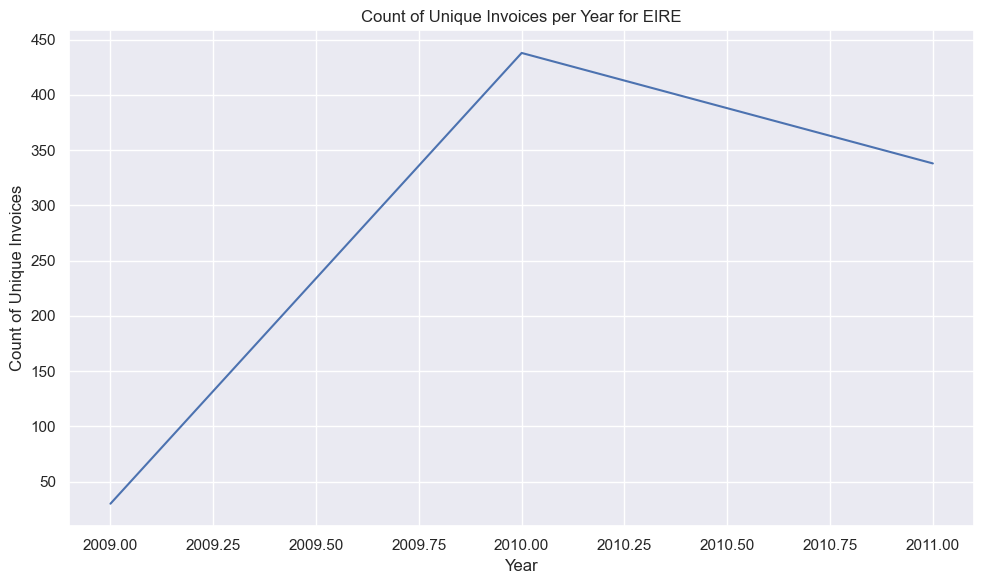

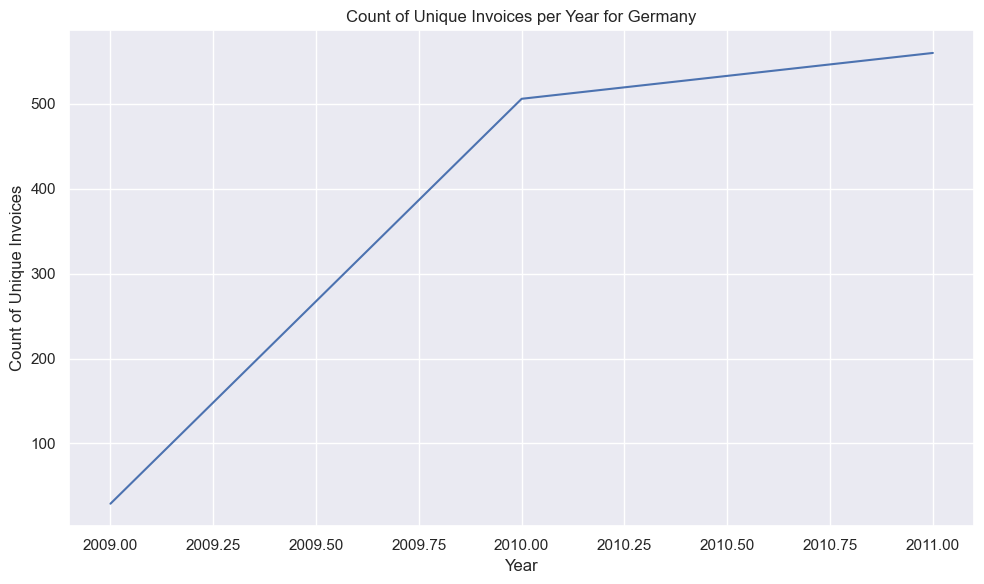

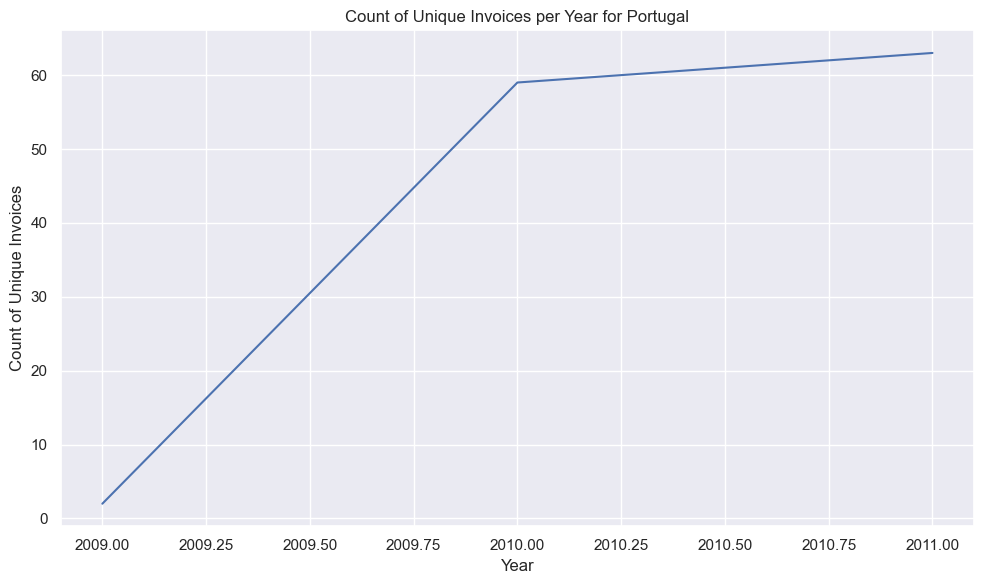

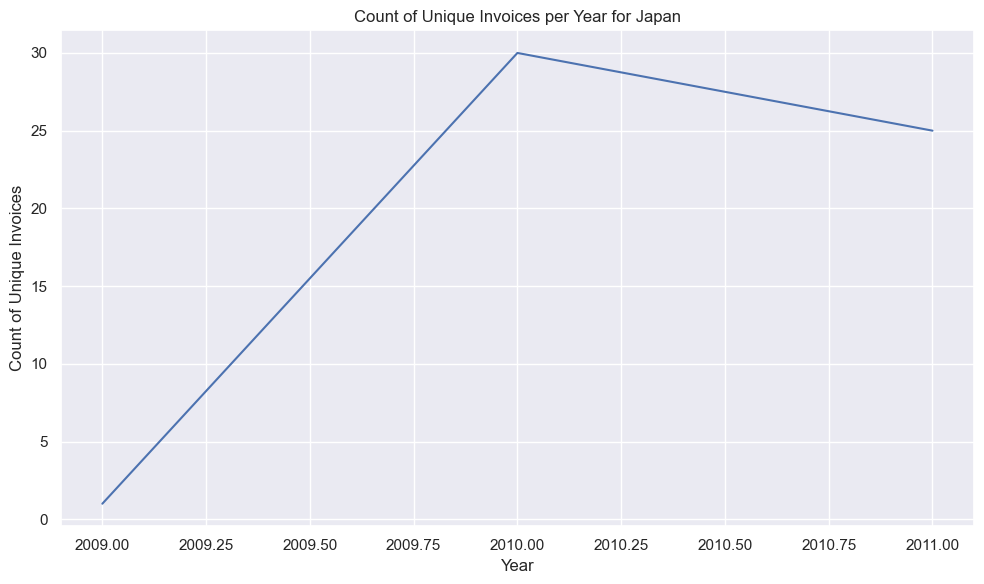

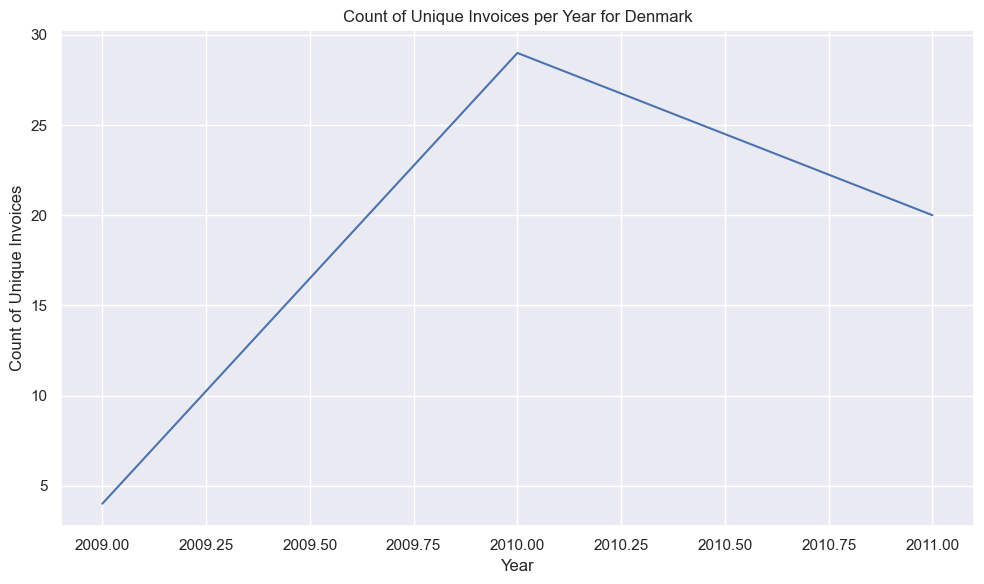

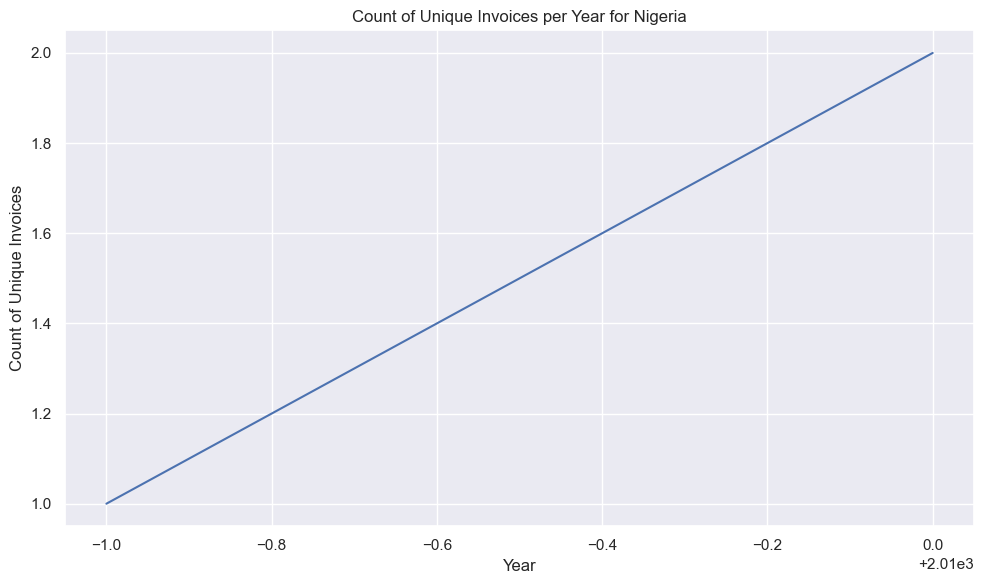

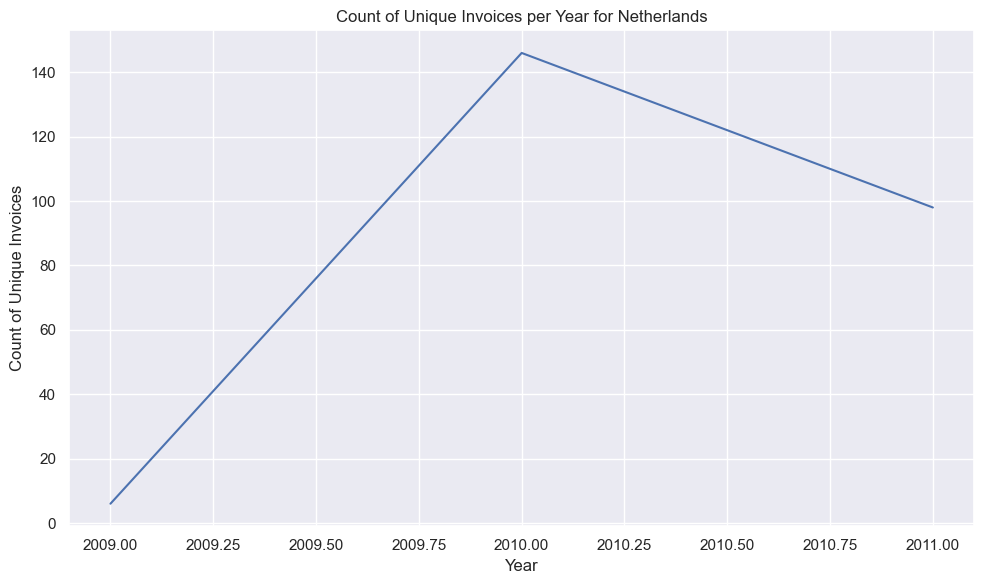

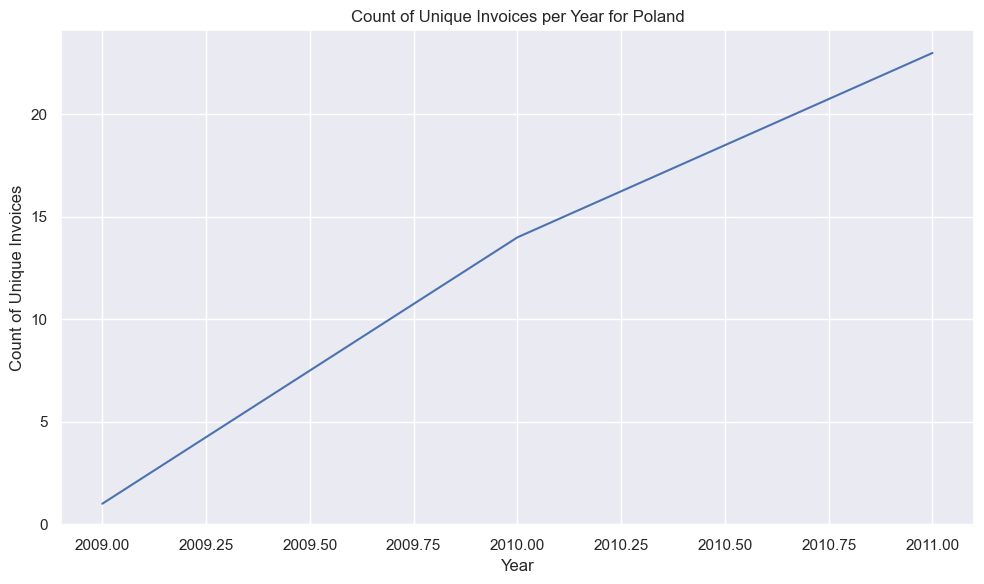

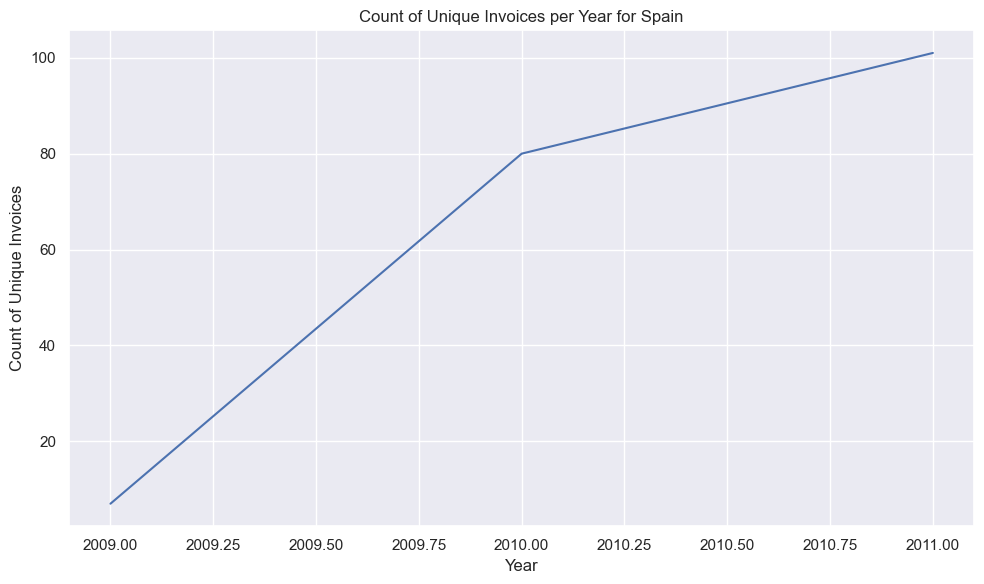

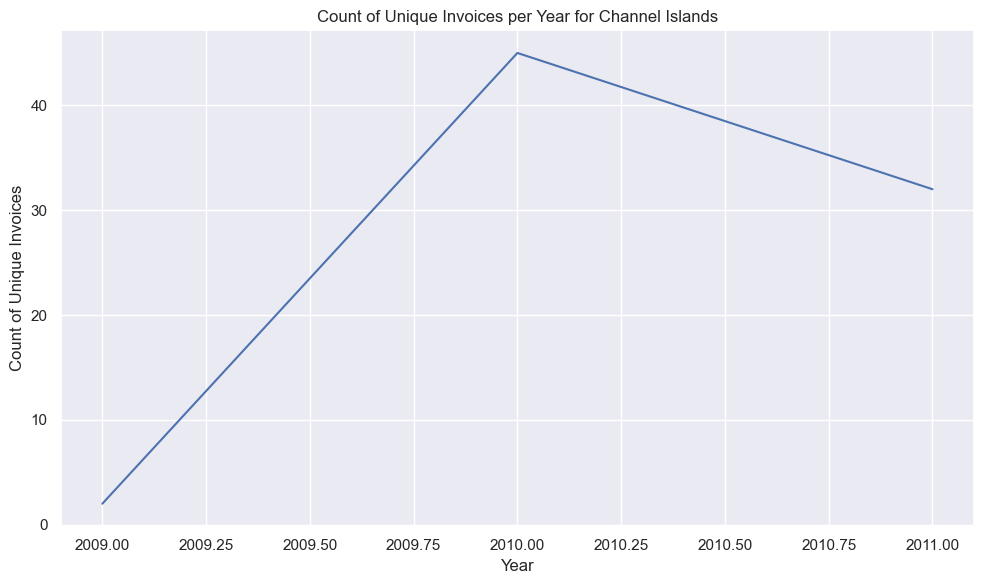

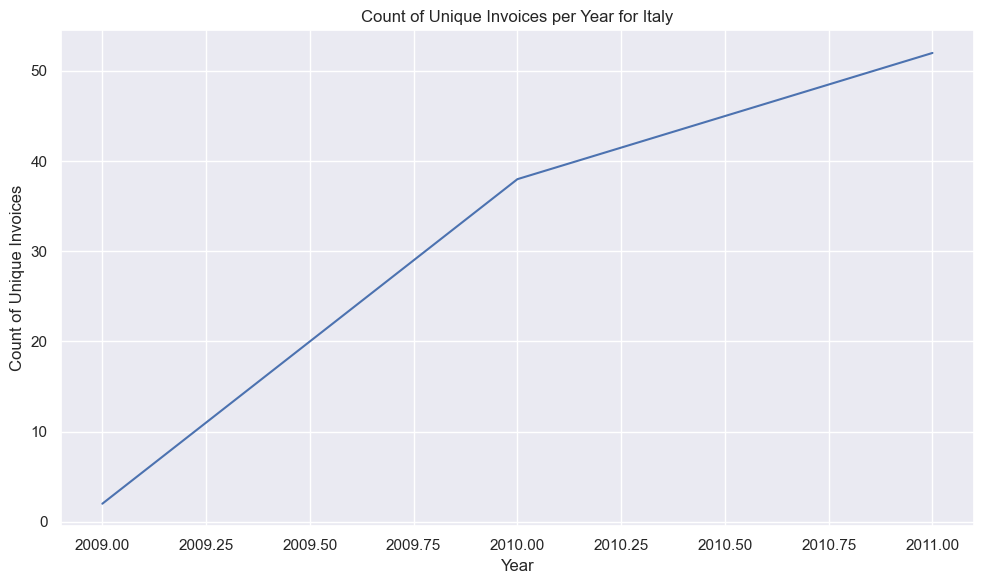

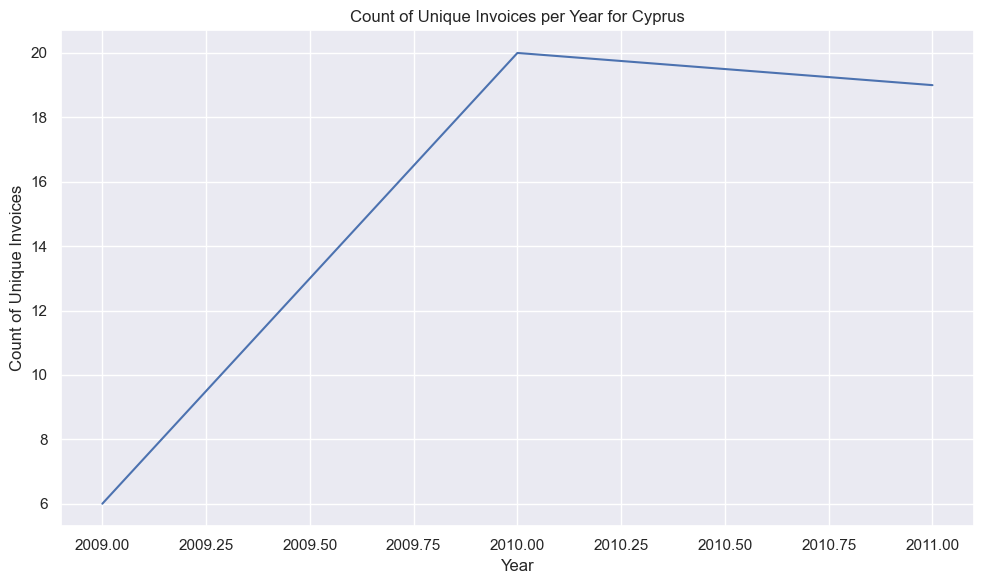

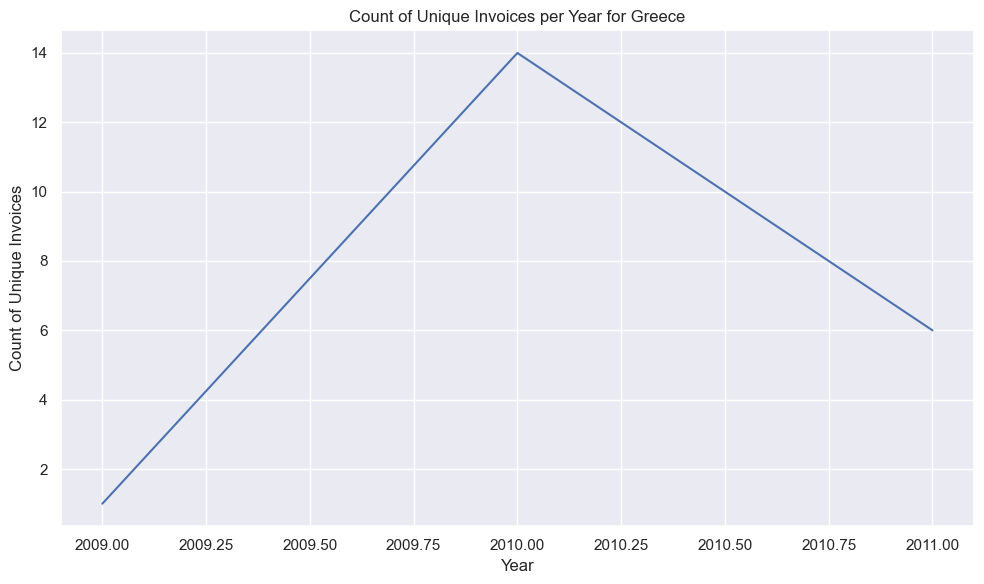

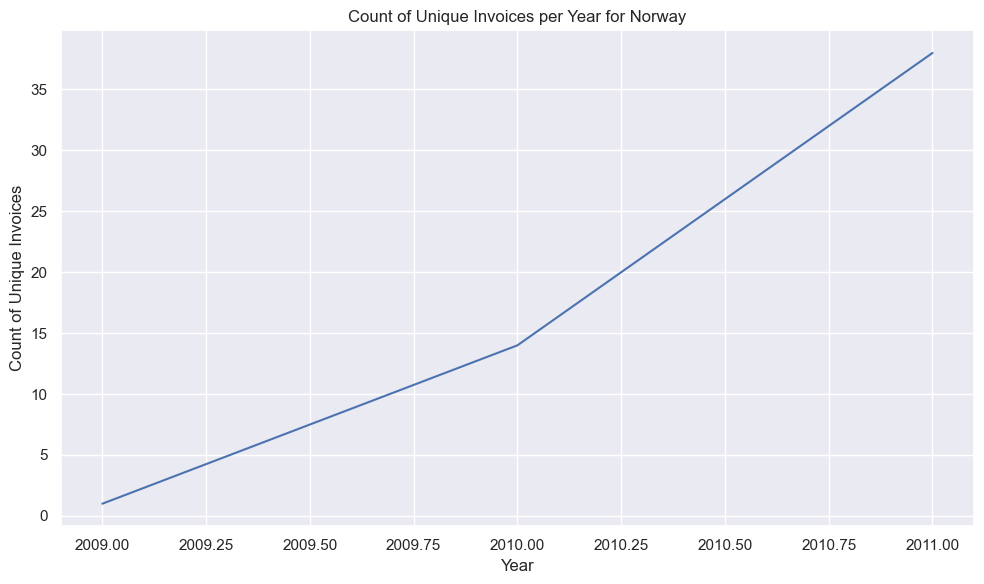

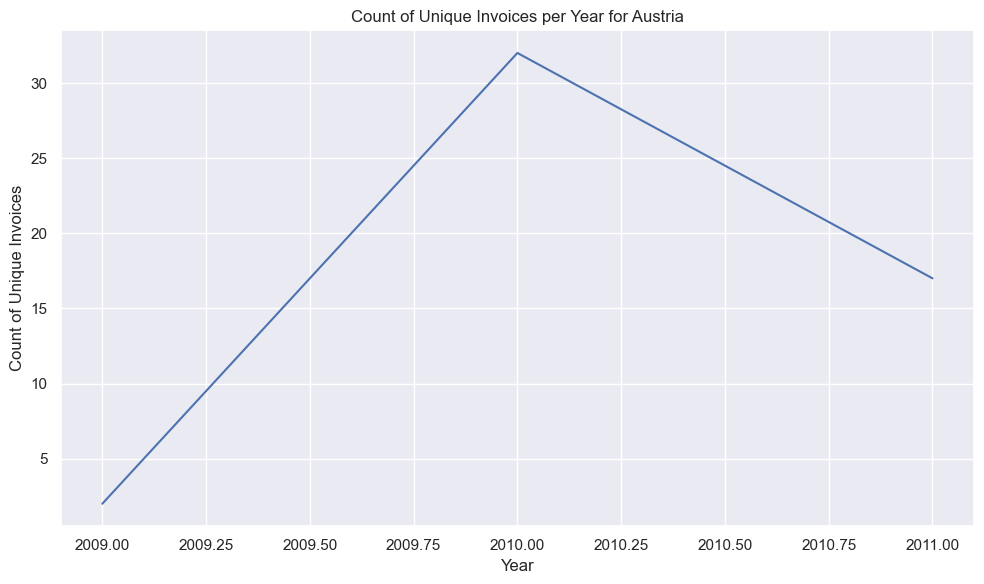

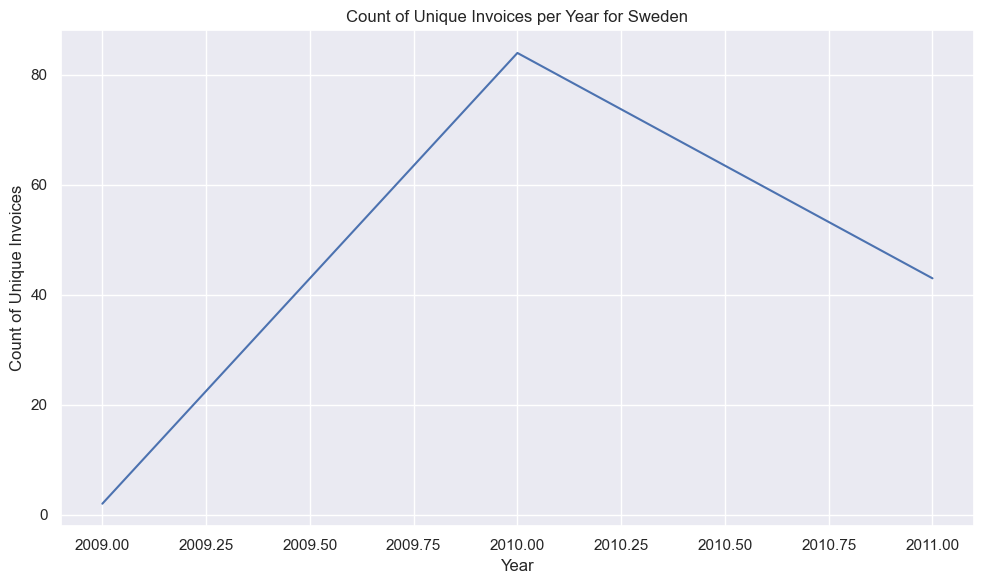

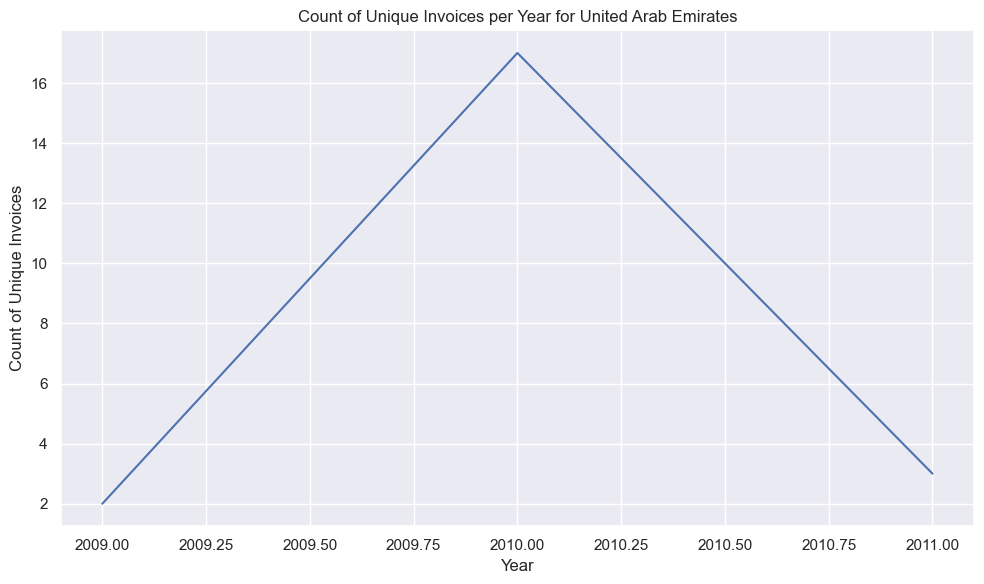

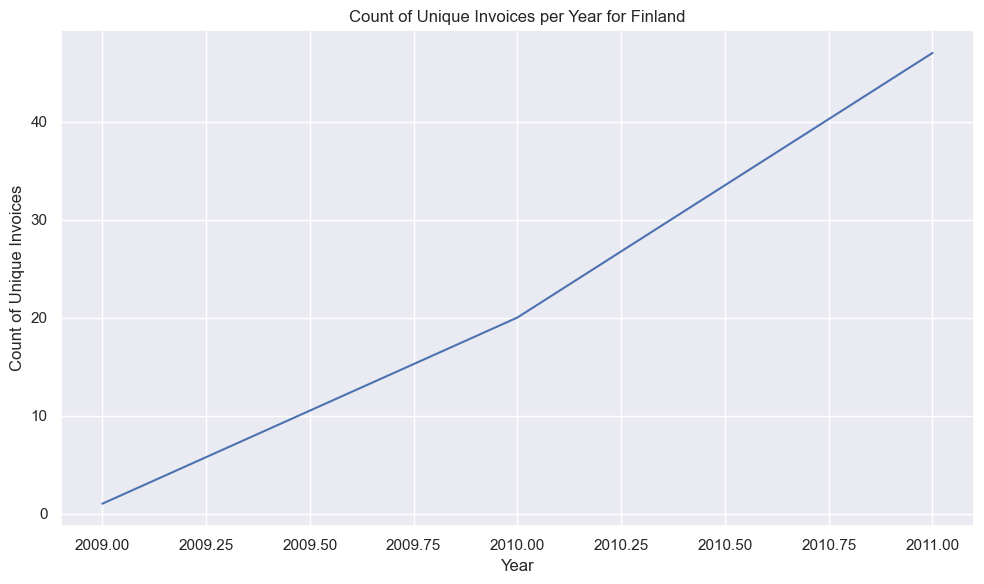

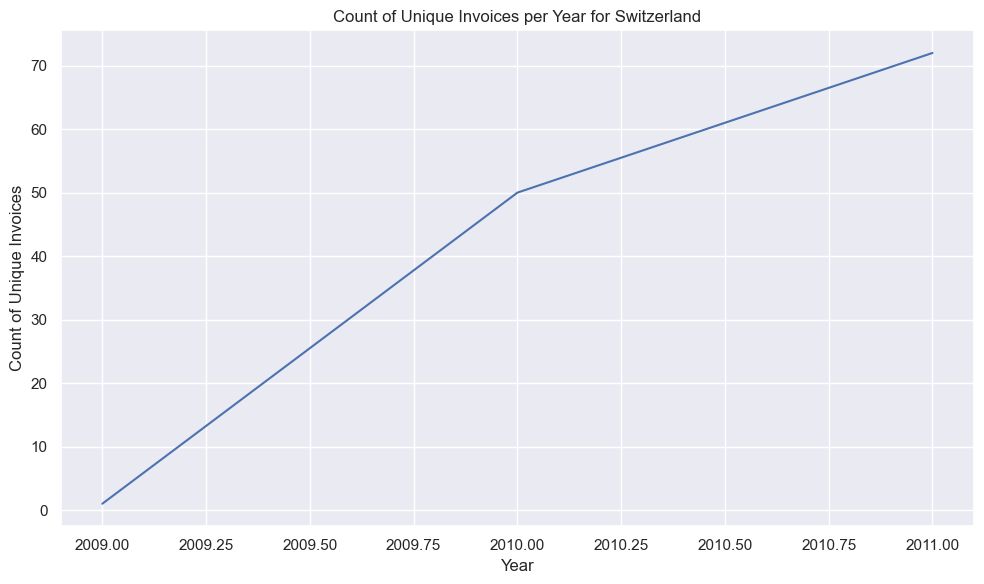

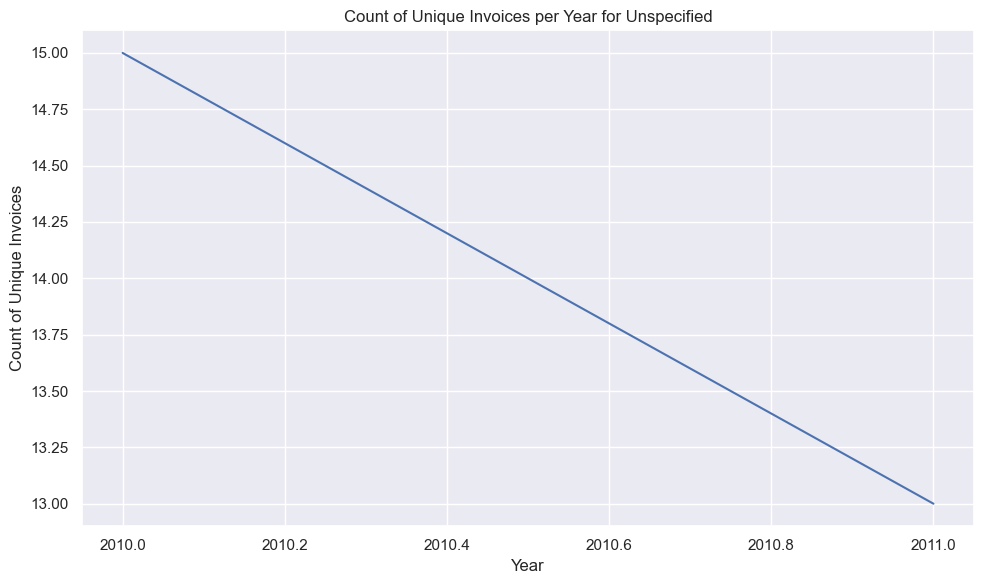

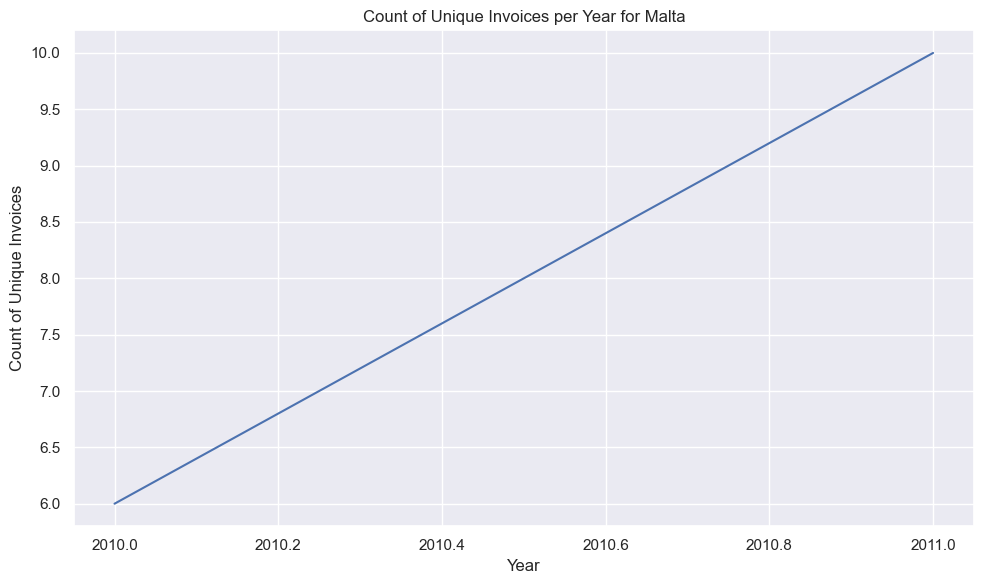

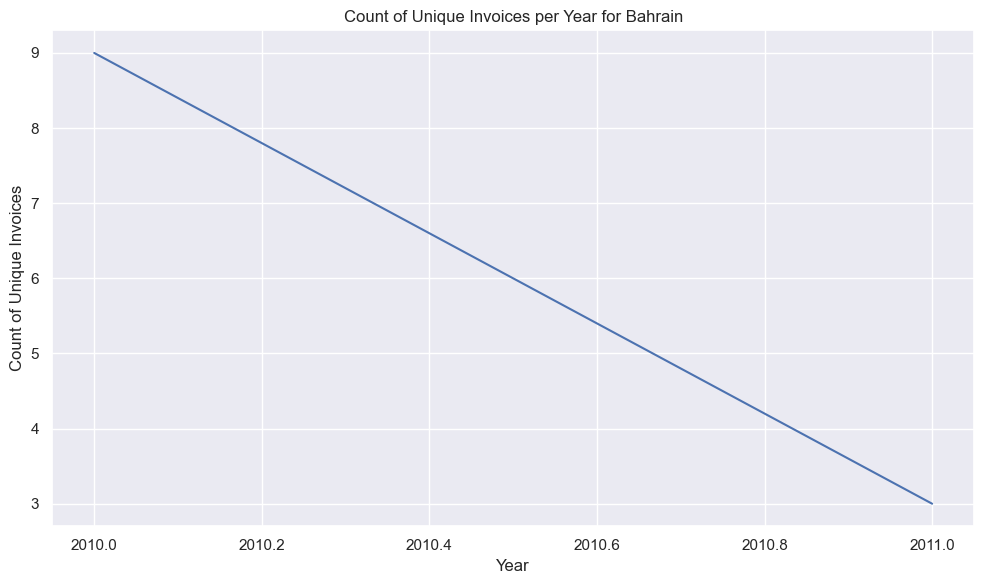

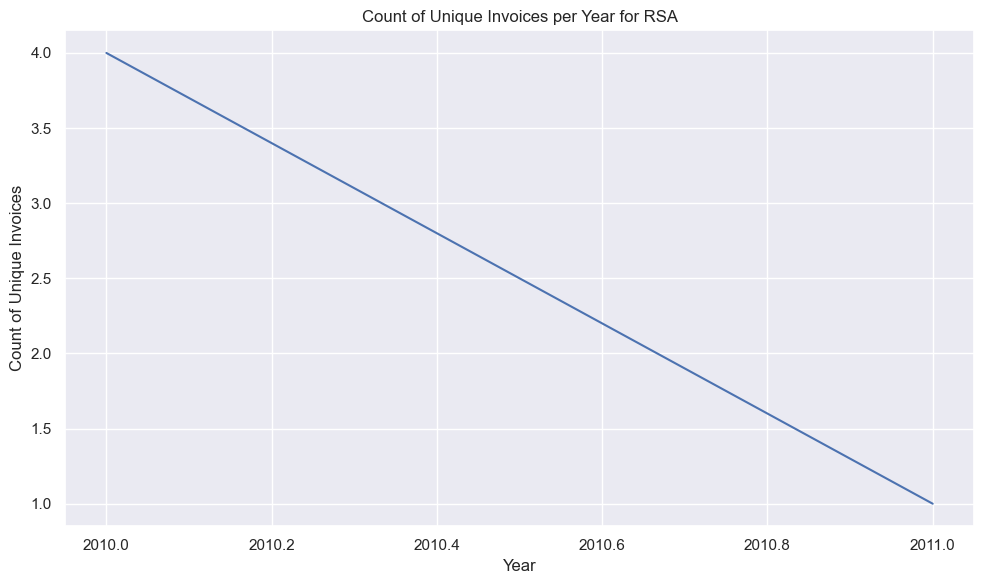

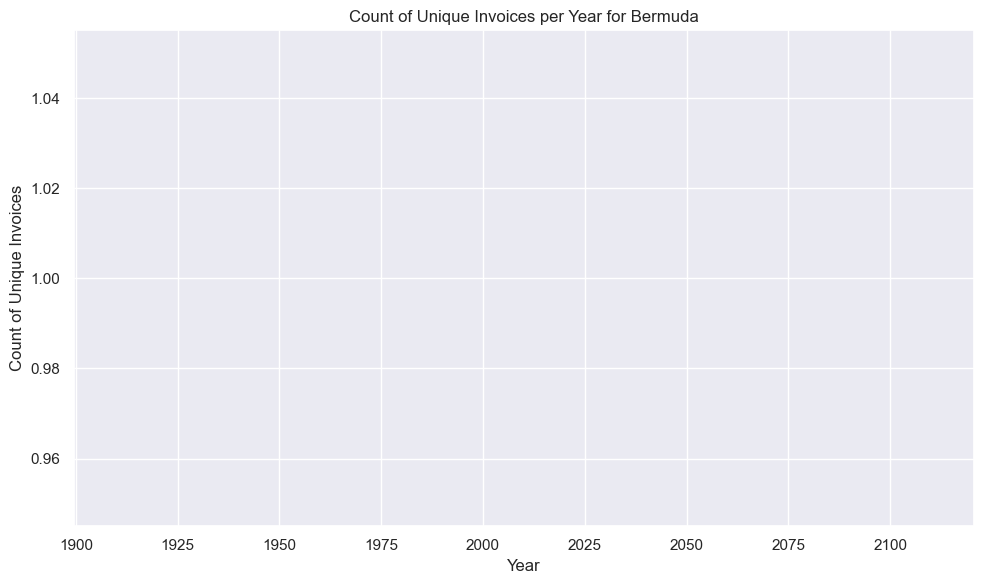

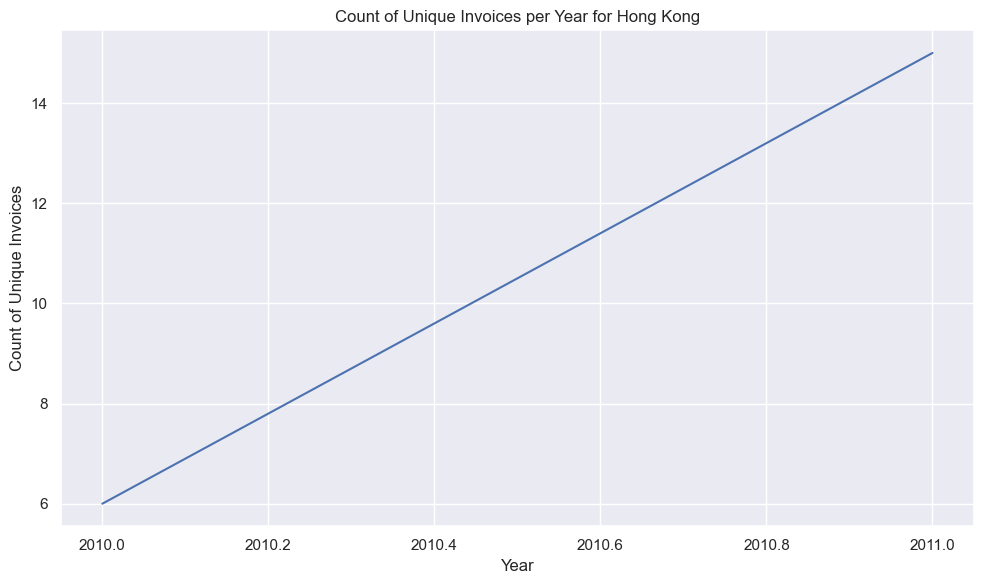

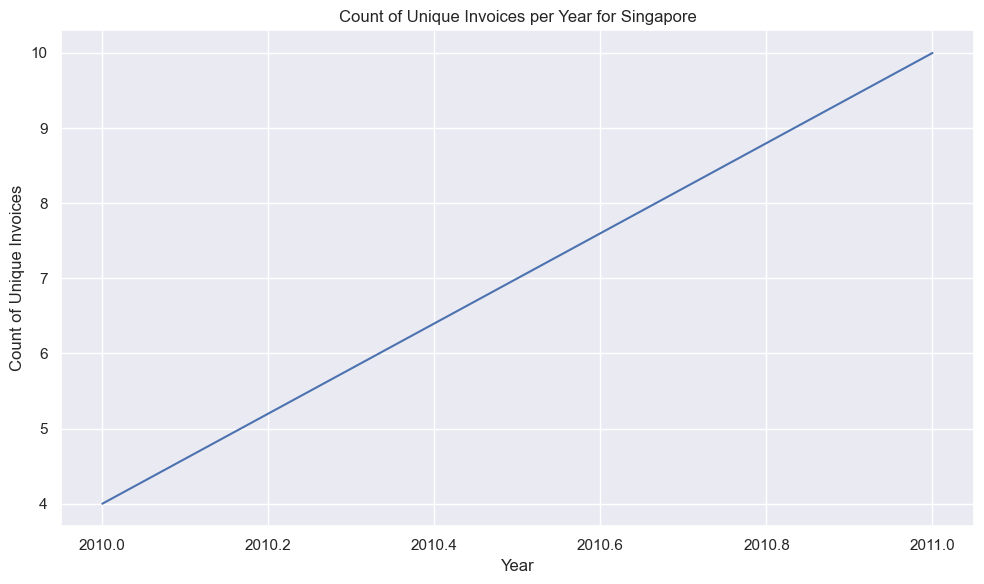

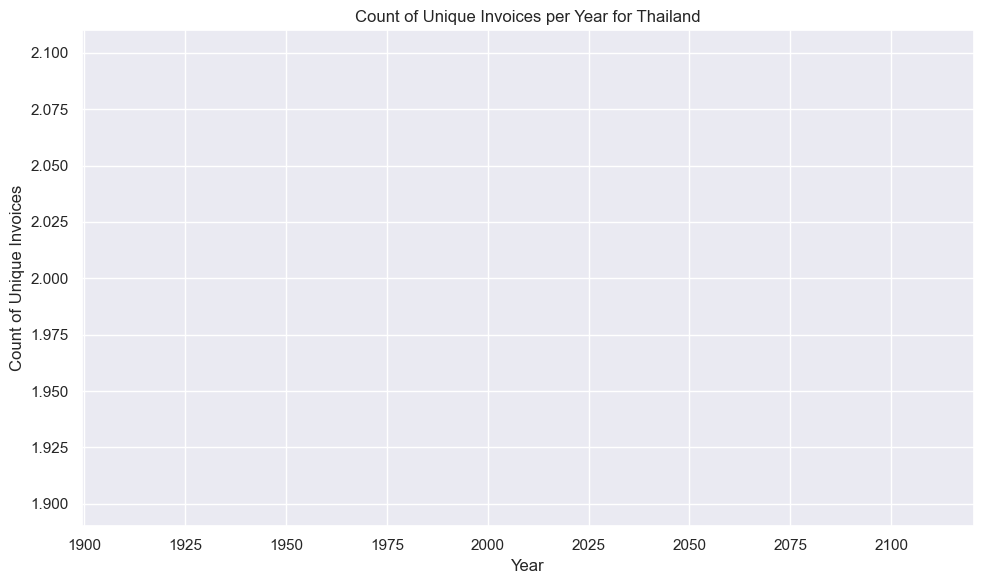

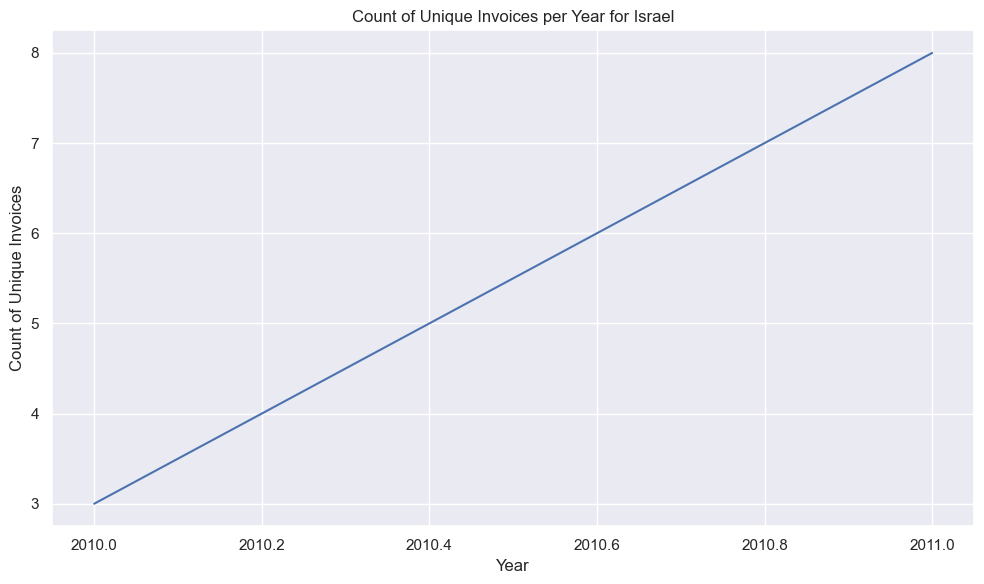

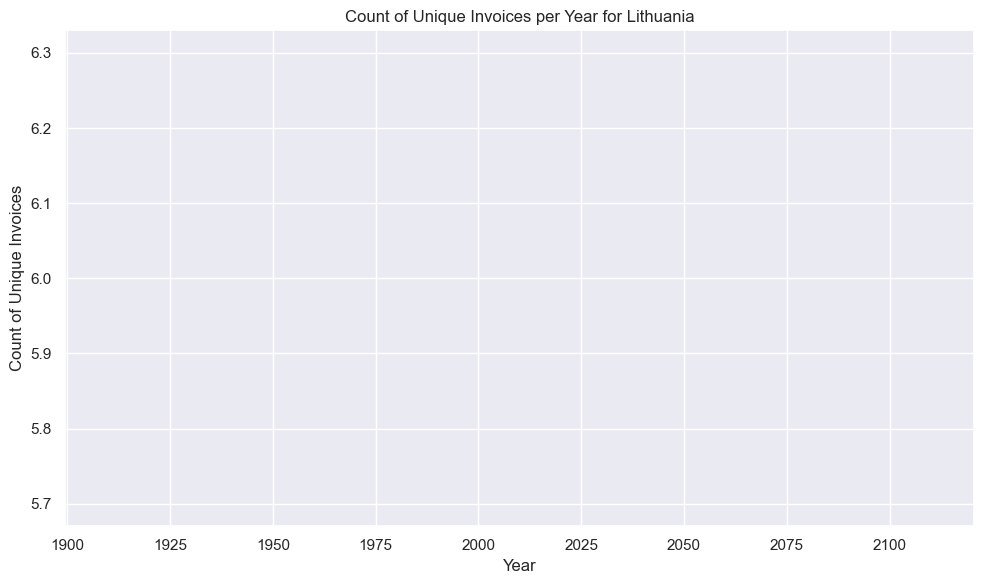

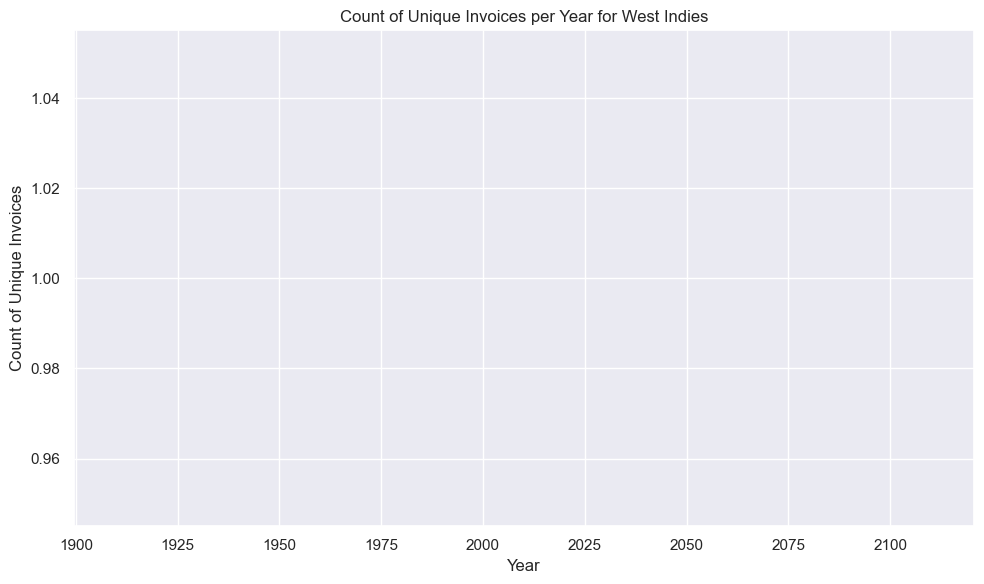

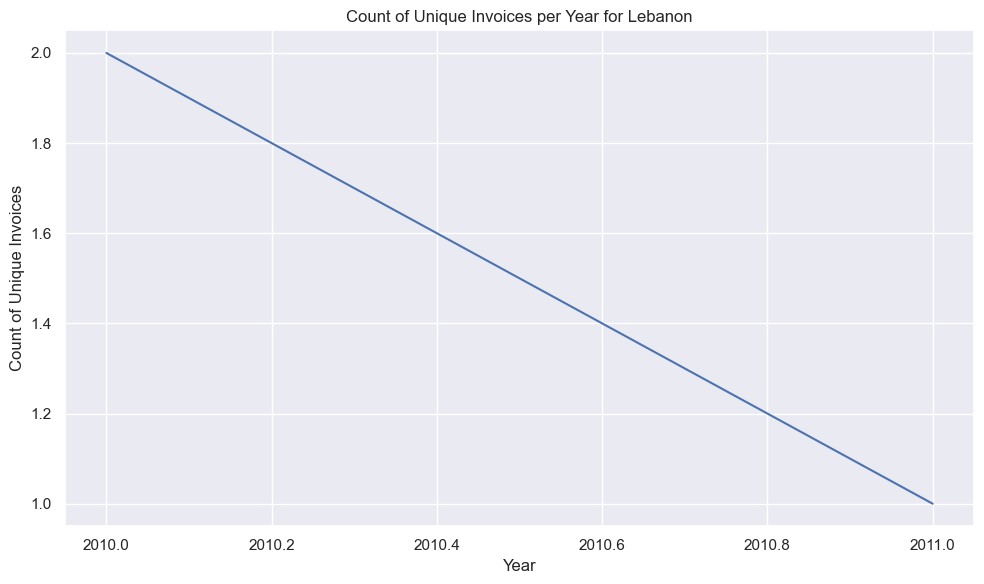

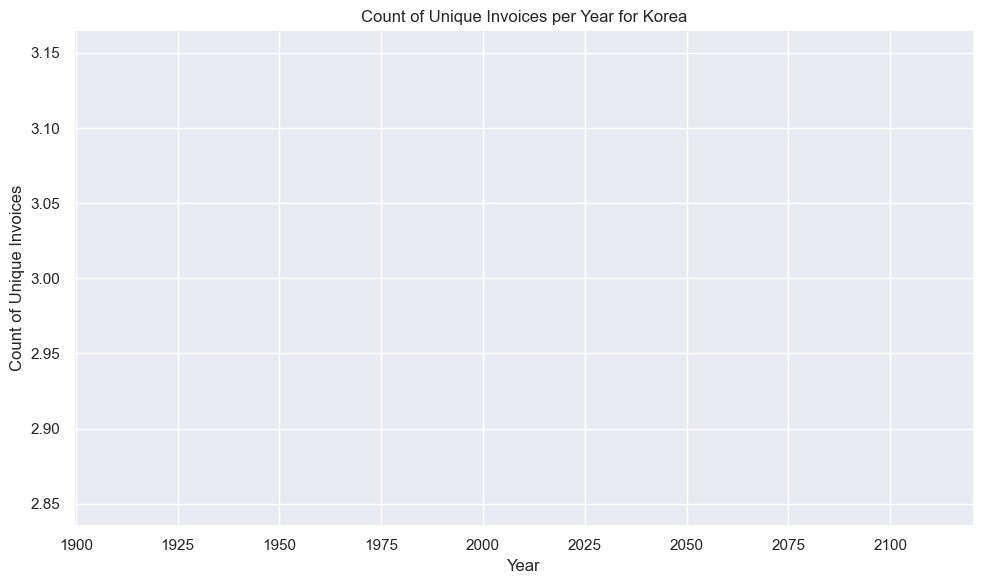

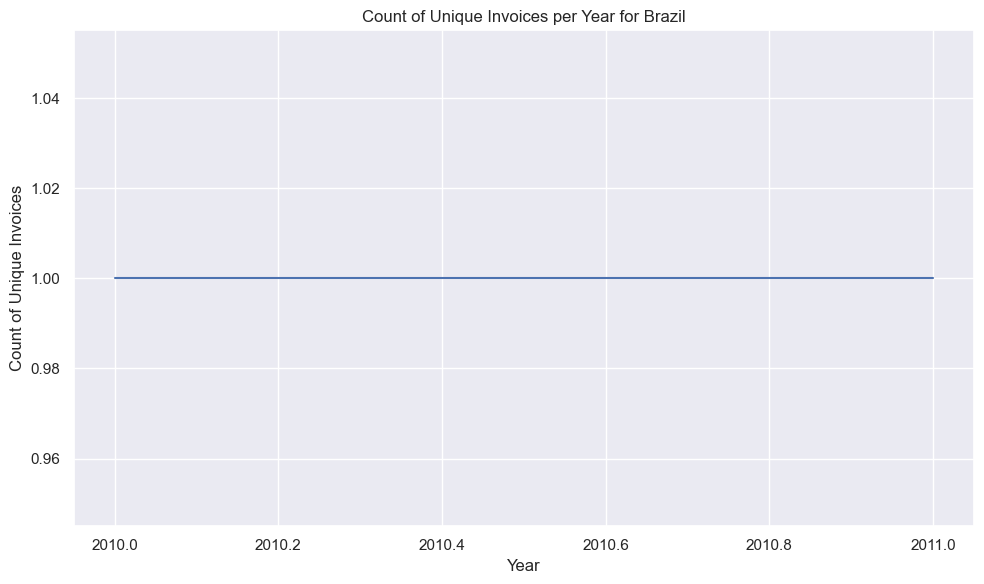

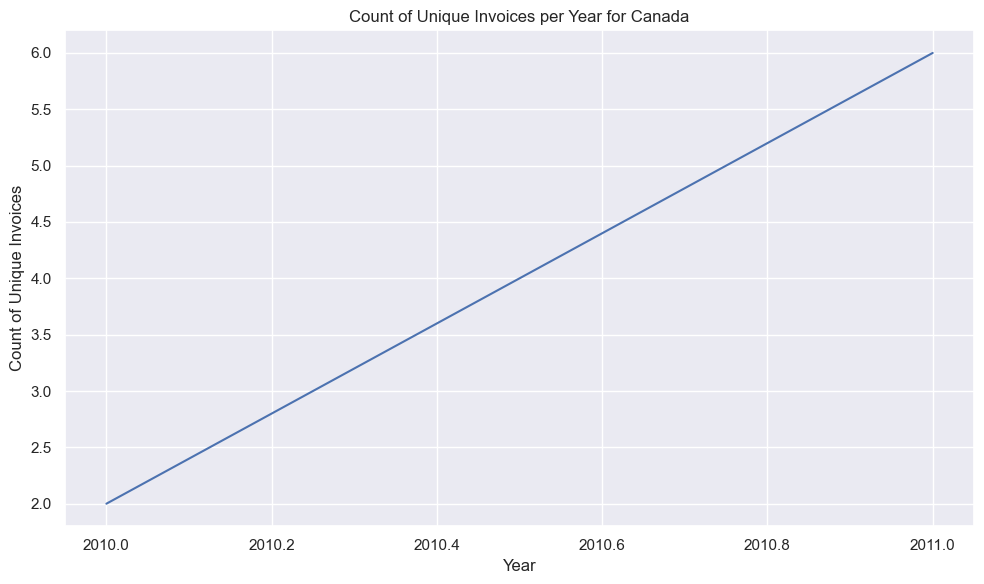

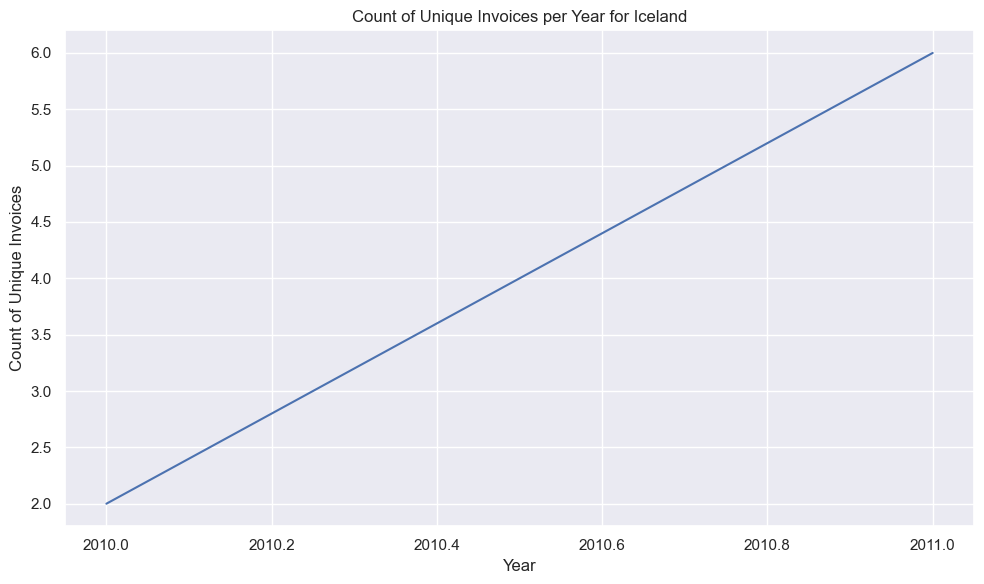

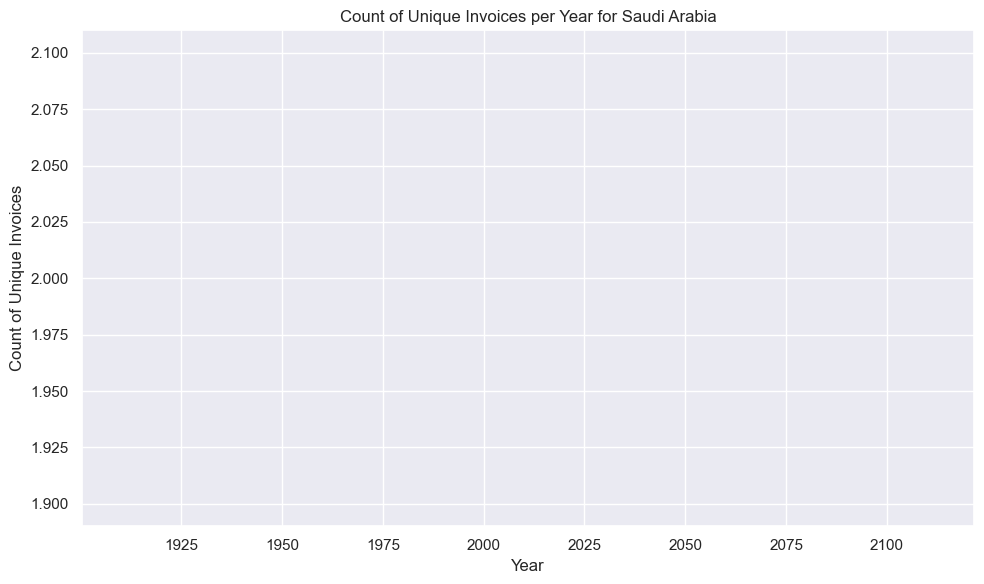

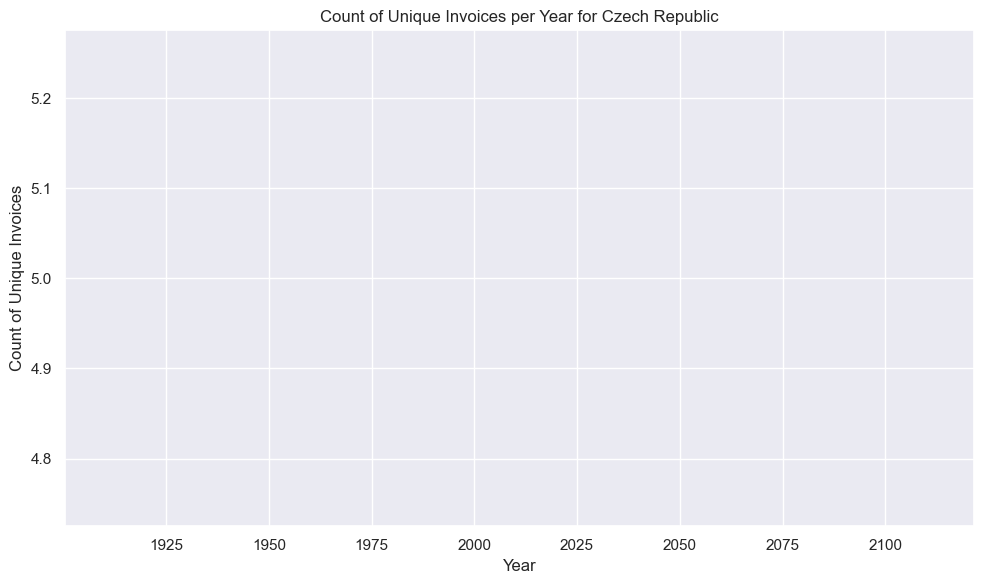

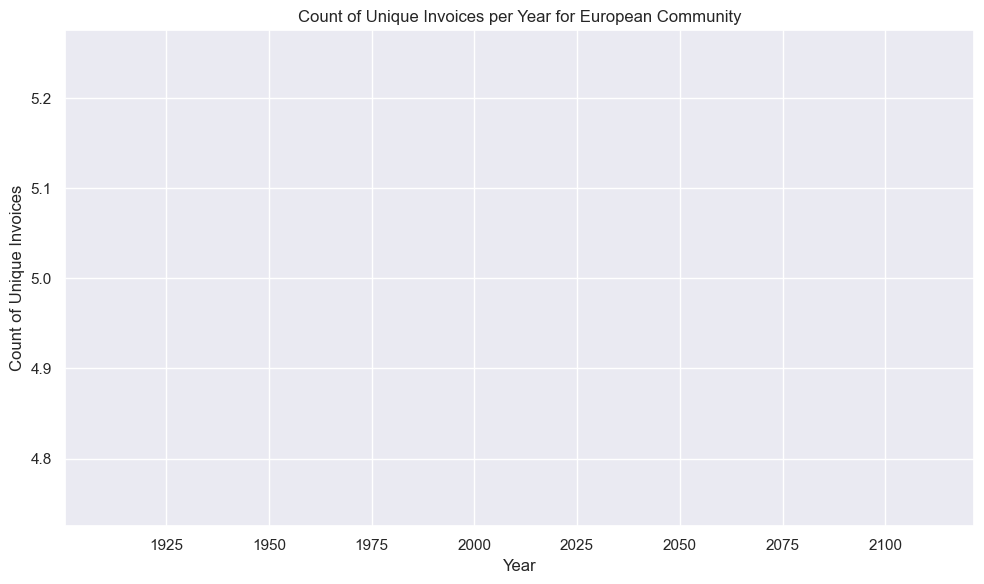

In [8]:
# Plot the graph to see the yearly trend of the sales
countries = df['Country'].unique()
for country in  countries:
    temp = df[df['Country']==country]
    temp['InvoiceDate'] = pd.to_datetime(temp['InvoiceDate'])
    temp['Year'] = temp['InvoiceDate'].dt.year
    temp = temp.groupby('Year')['Invoice'].nunique().reset_index()
    
    plt.figure(figsize=(10,6))
    plt.plot(temp['Year'],temp['Invoice'])
    plt.xlabel('Year')
    plt.ylabel('Count of Unique Invoices')
    plt.title(f'Count of Unique Invoices per Year for {country}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

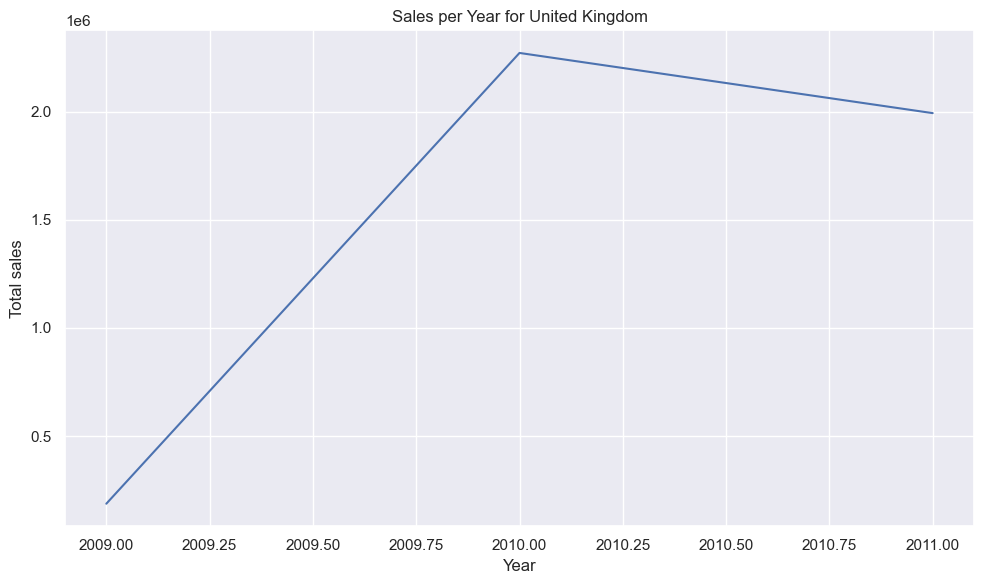

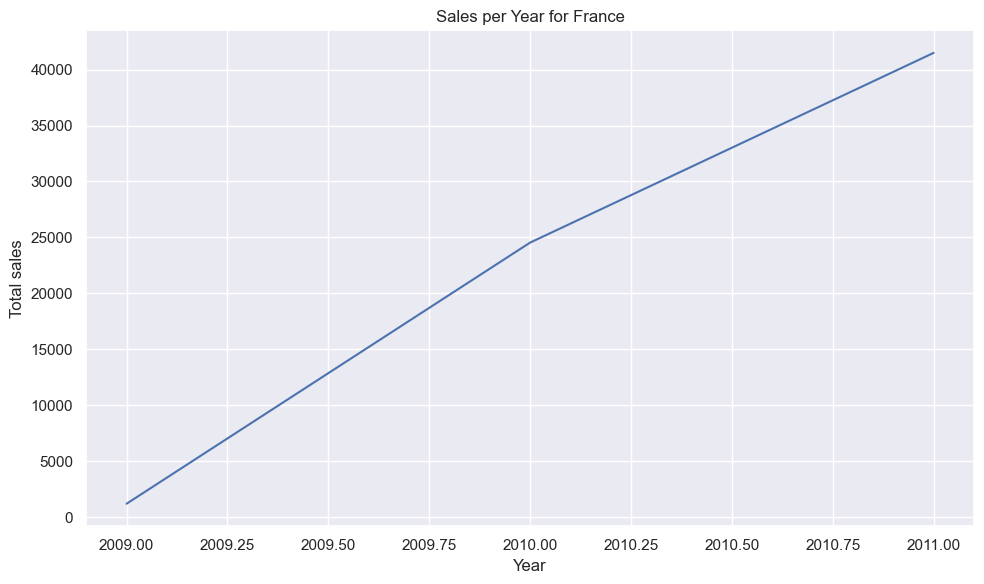

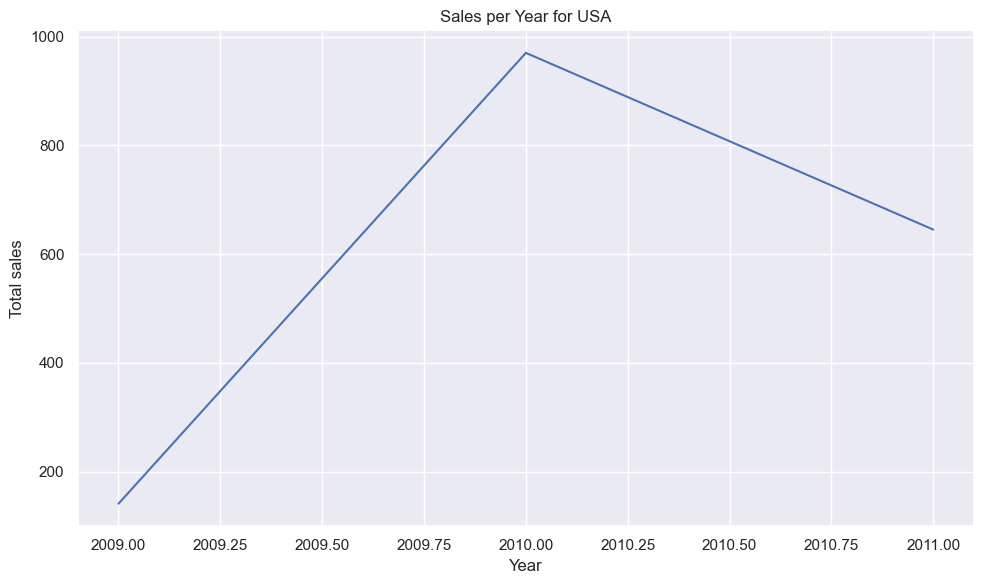

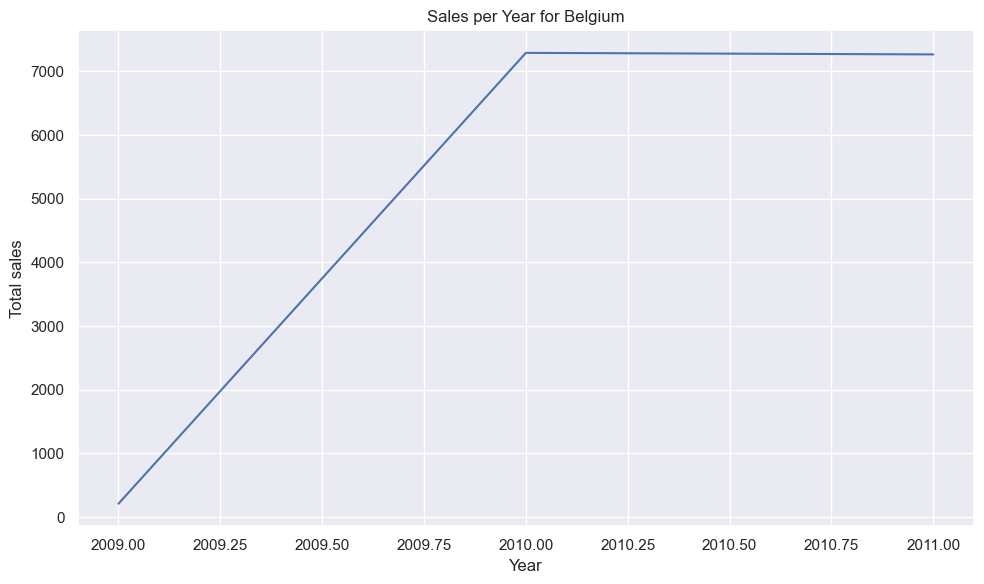

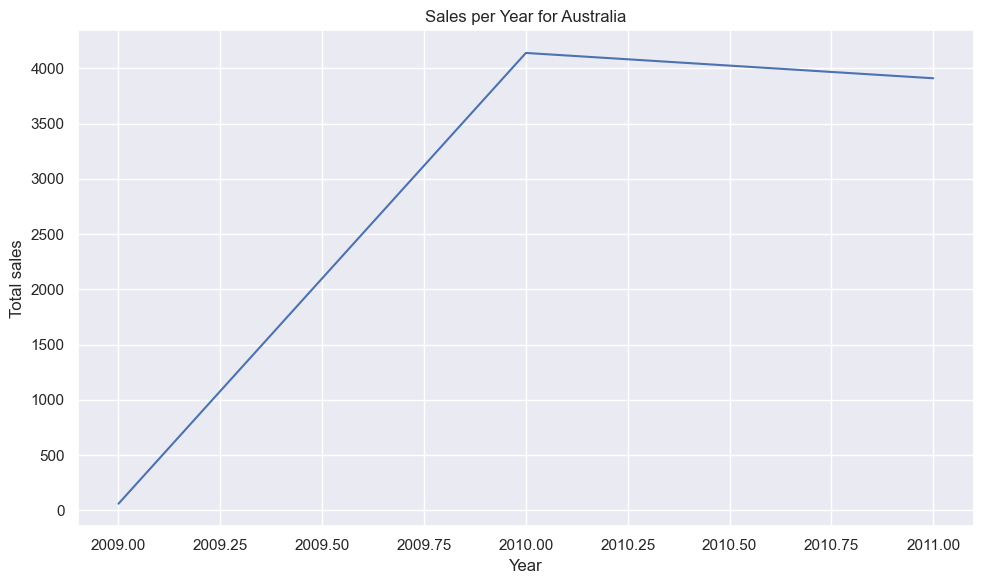

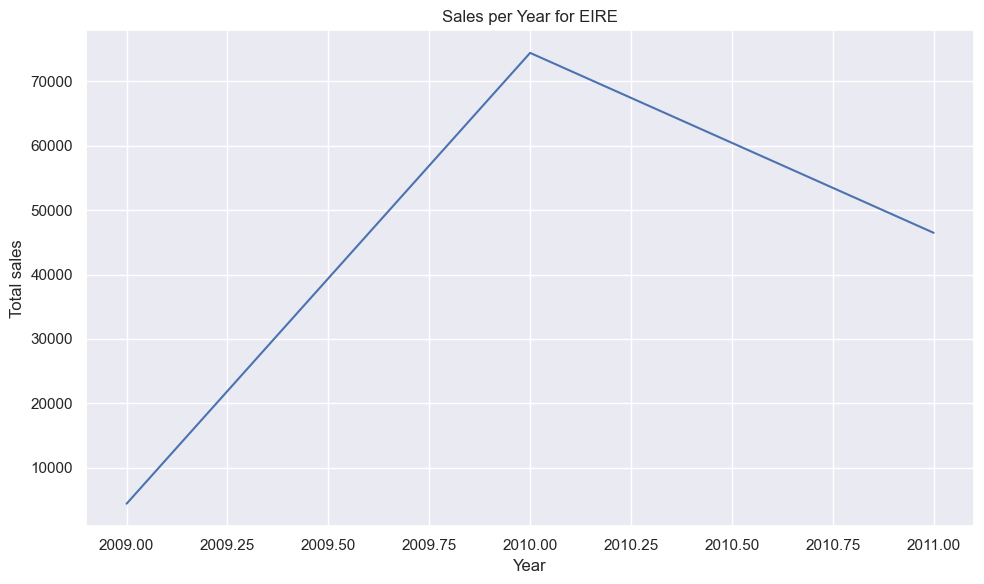

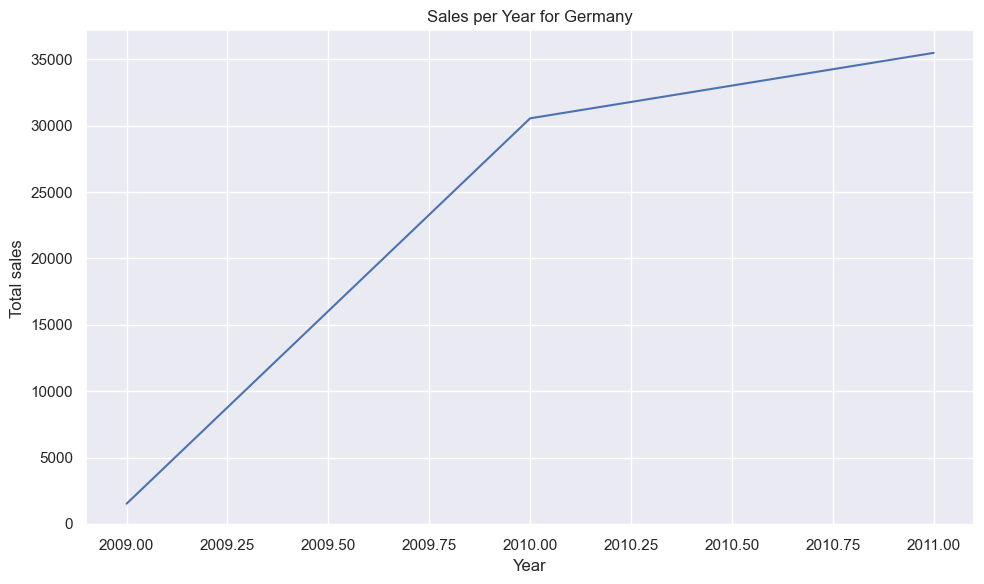

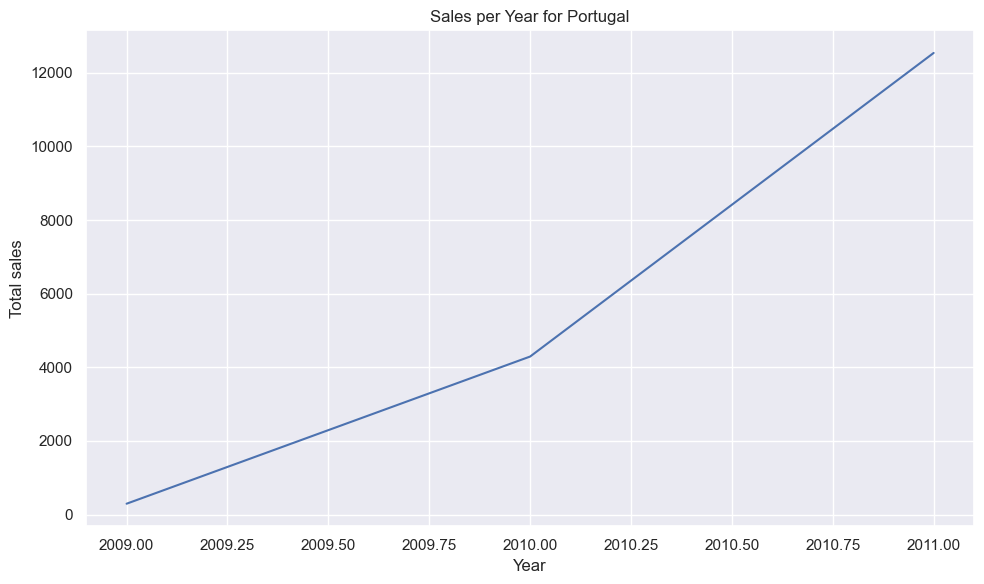

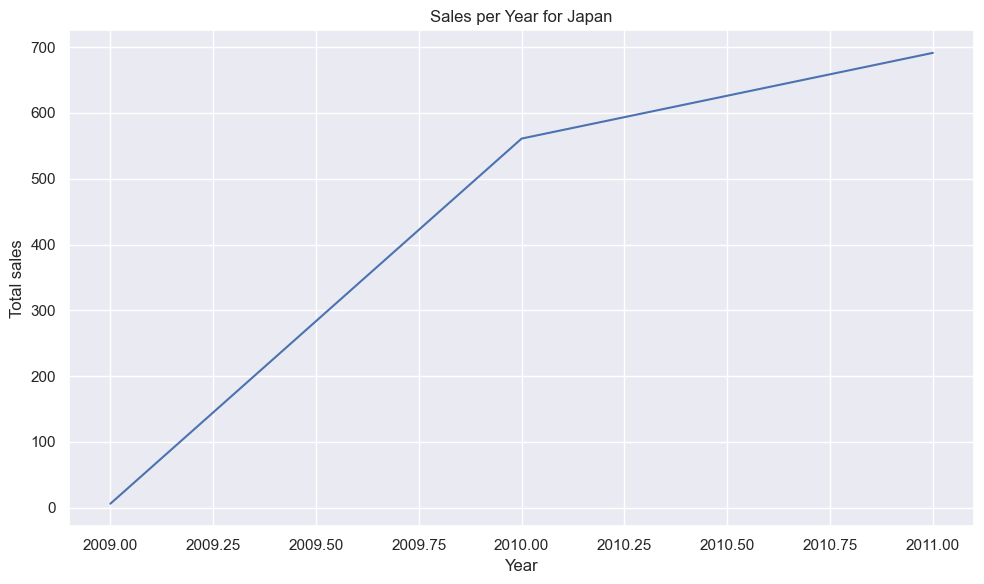

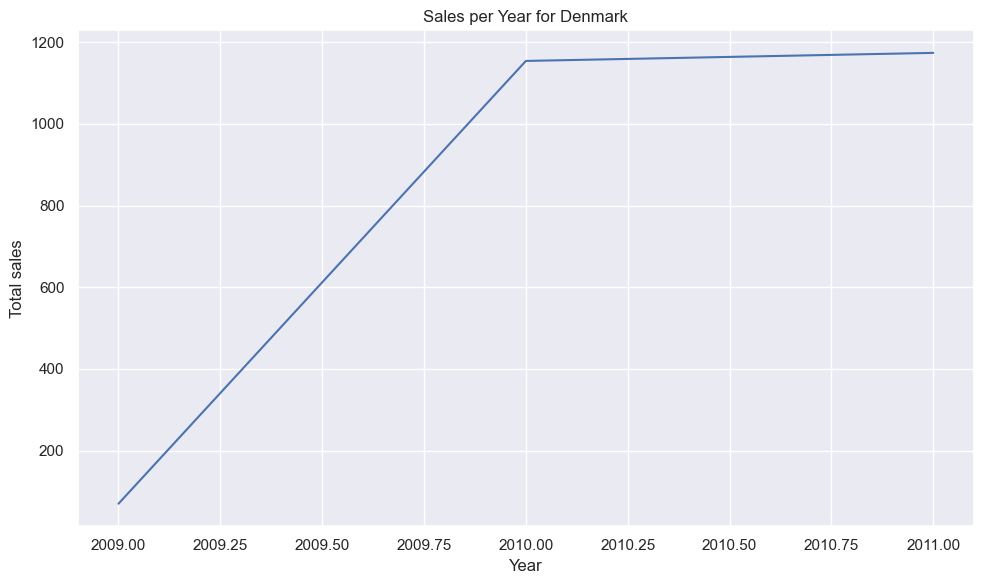

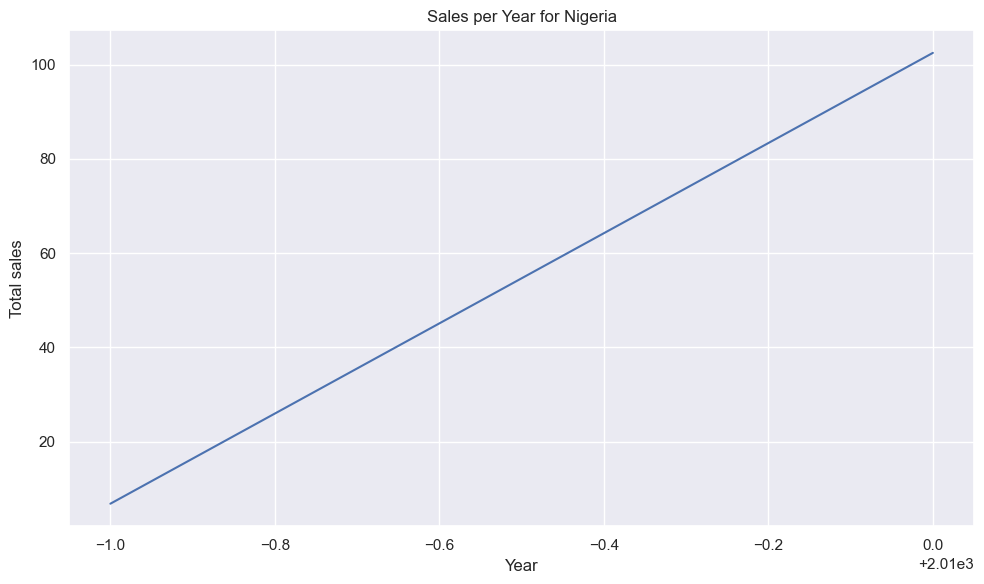

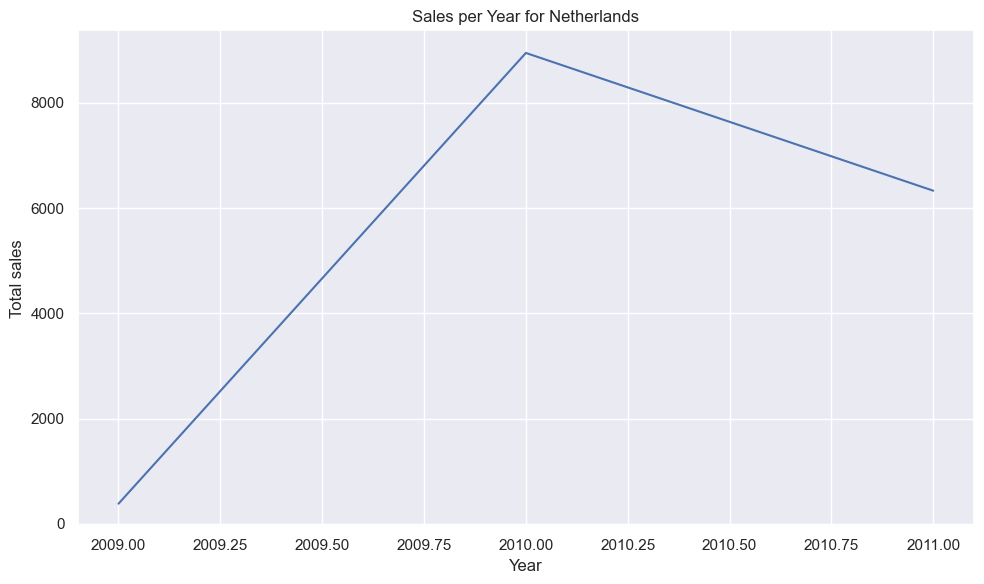

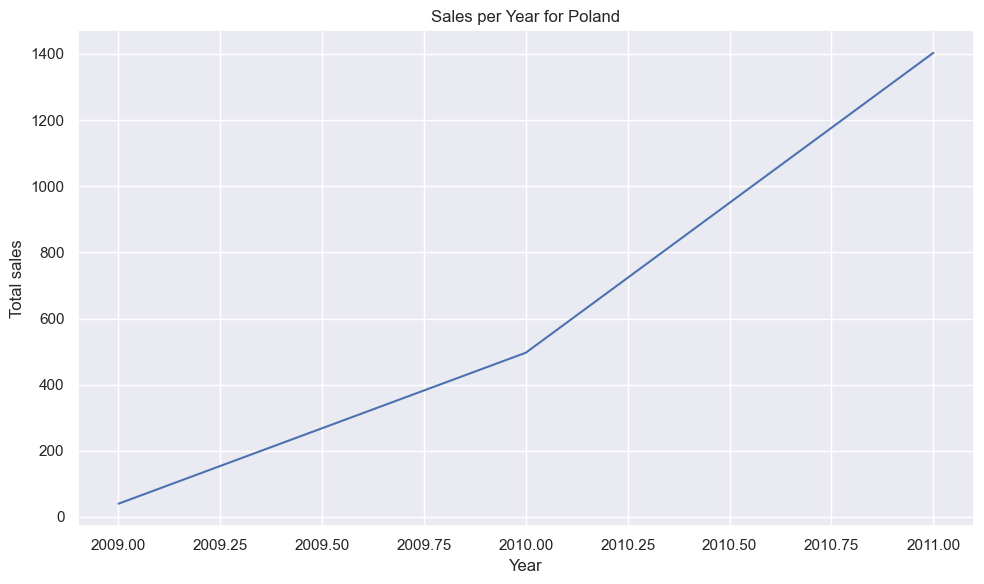

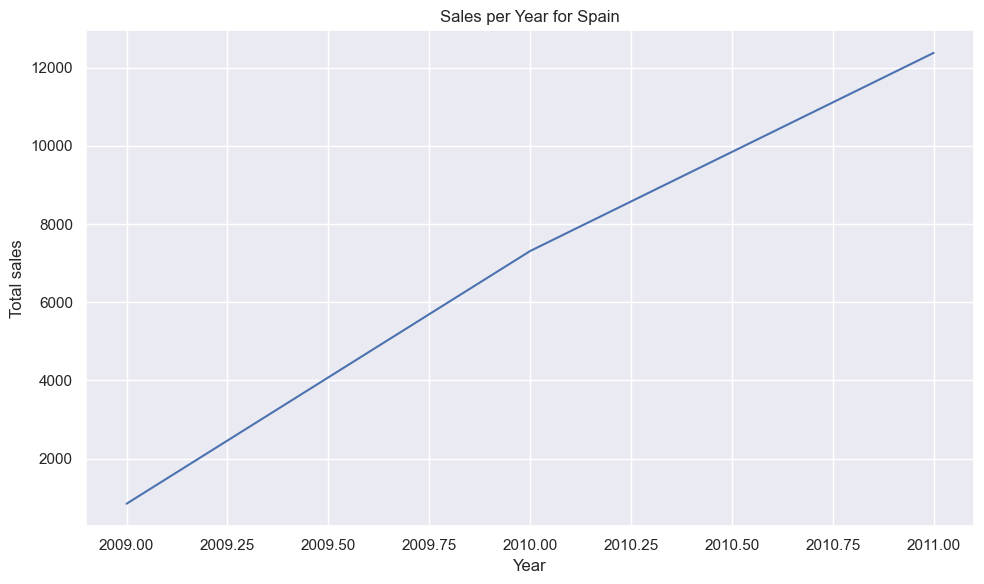

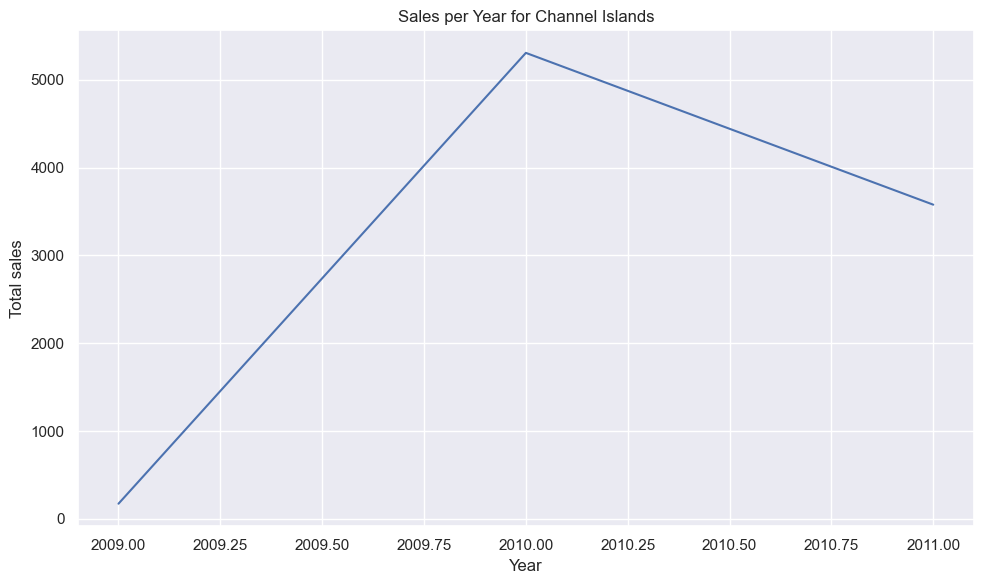

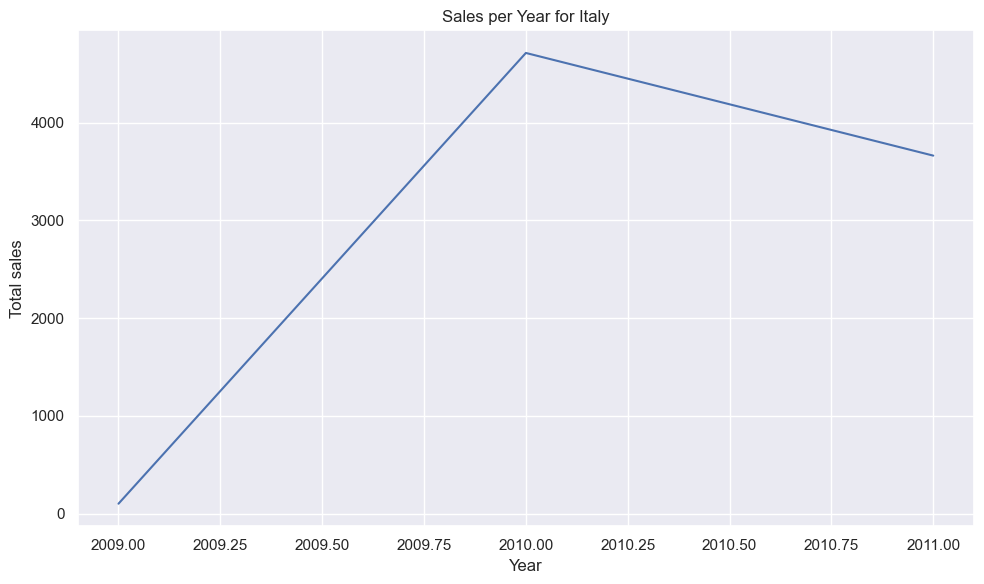

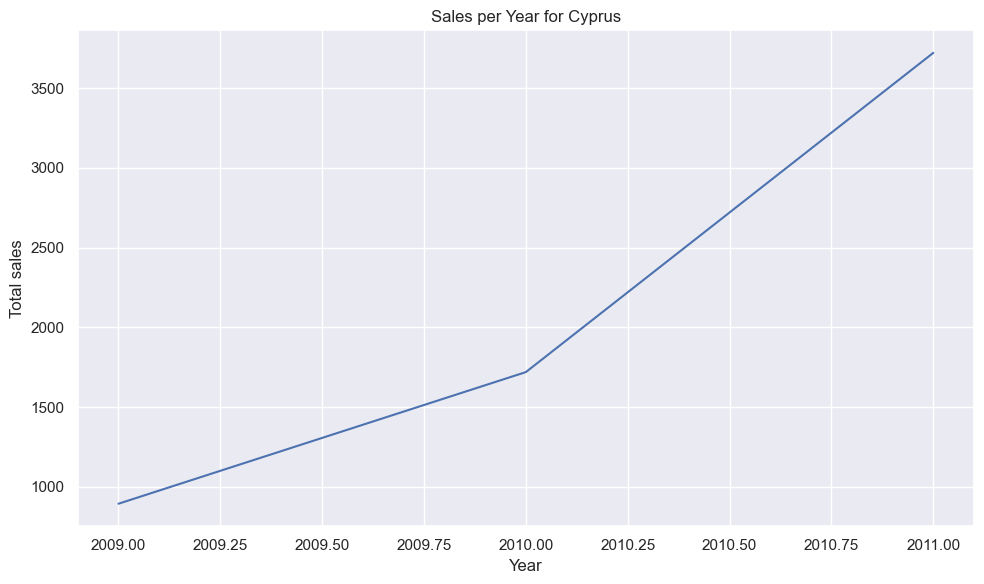

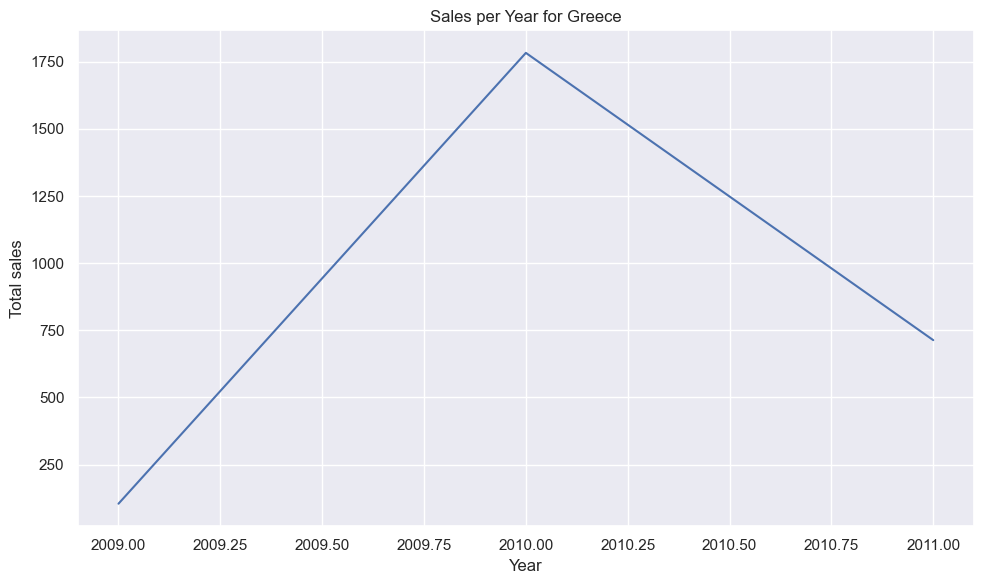

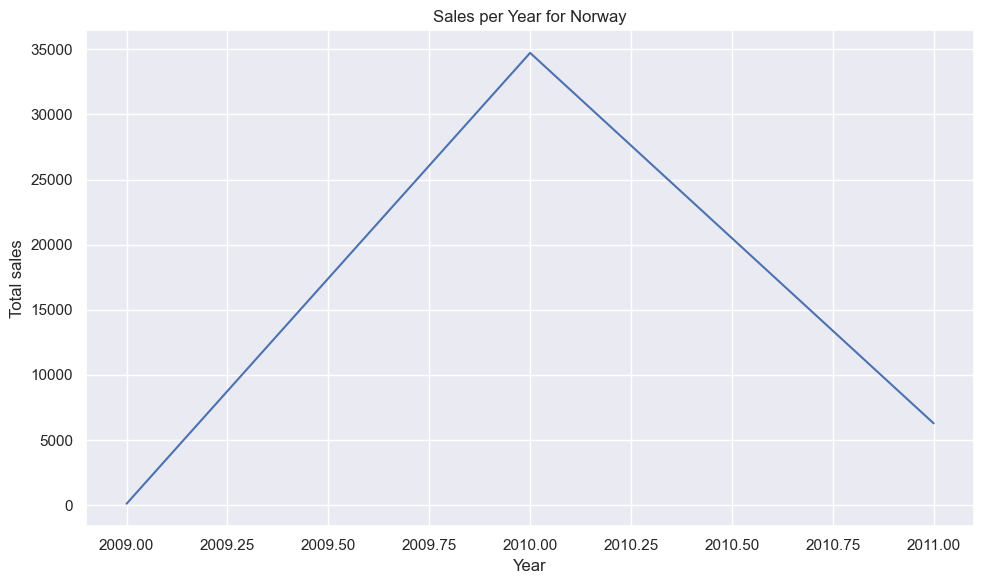

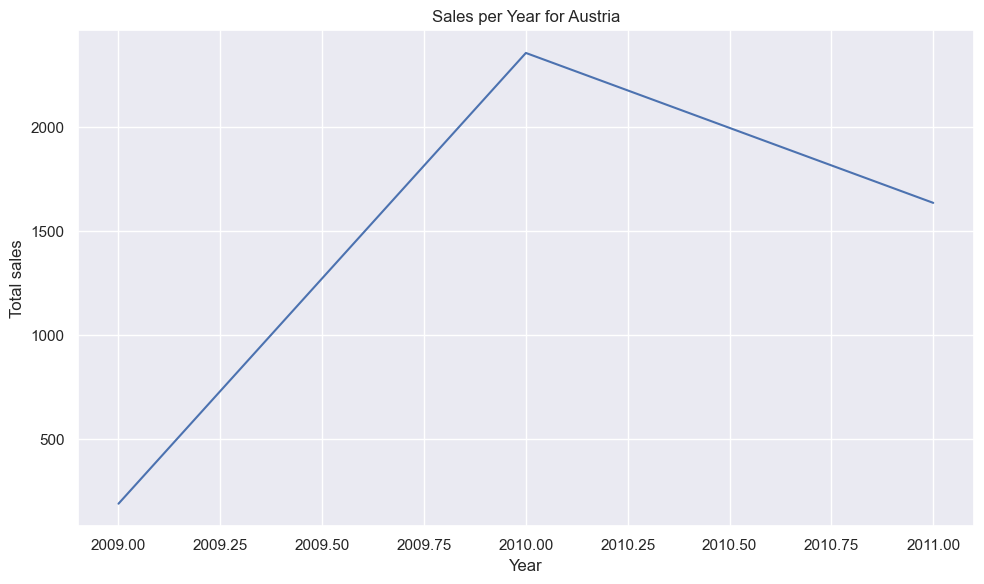

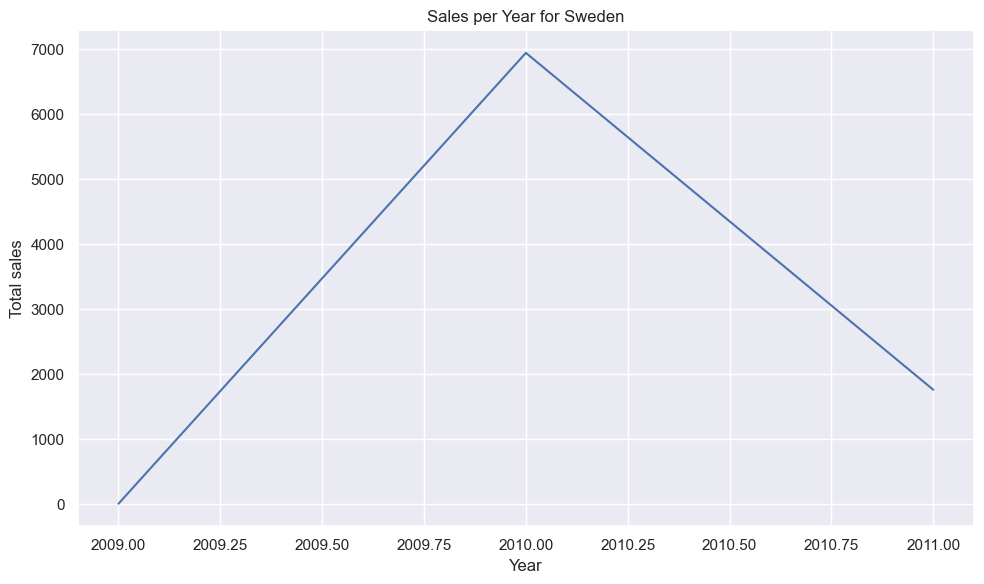

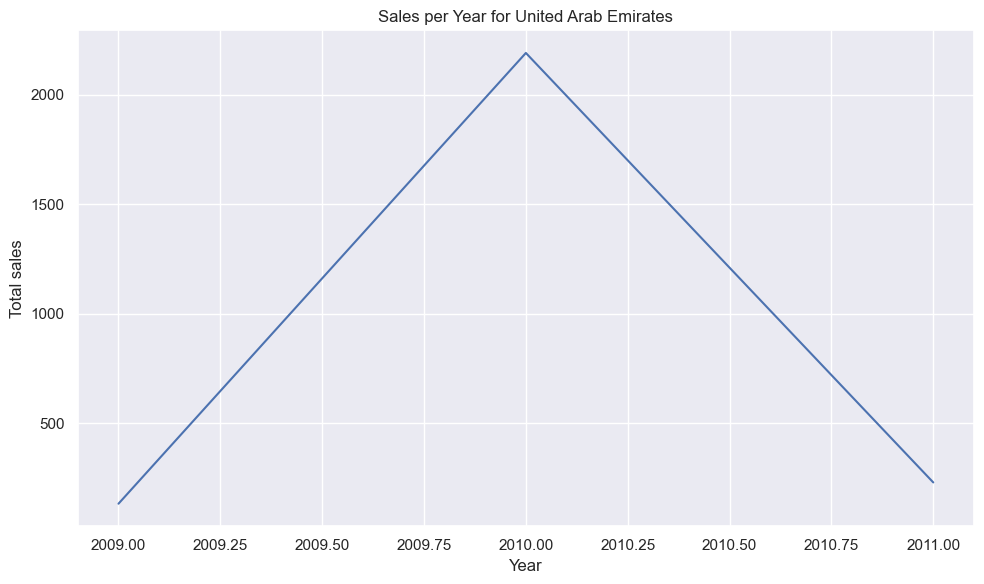

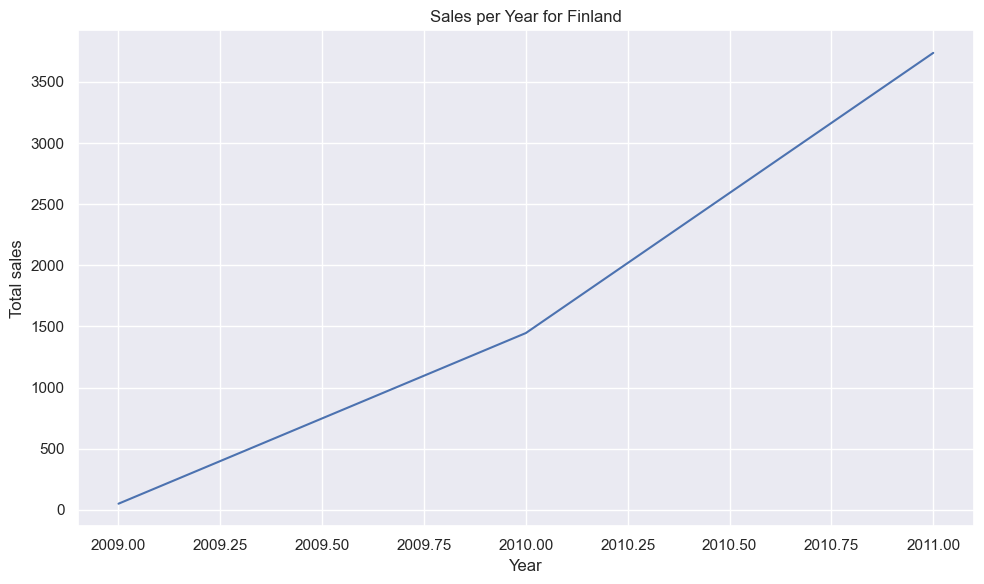

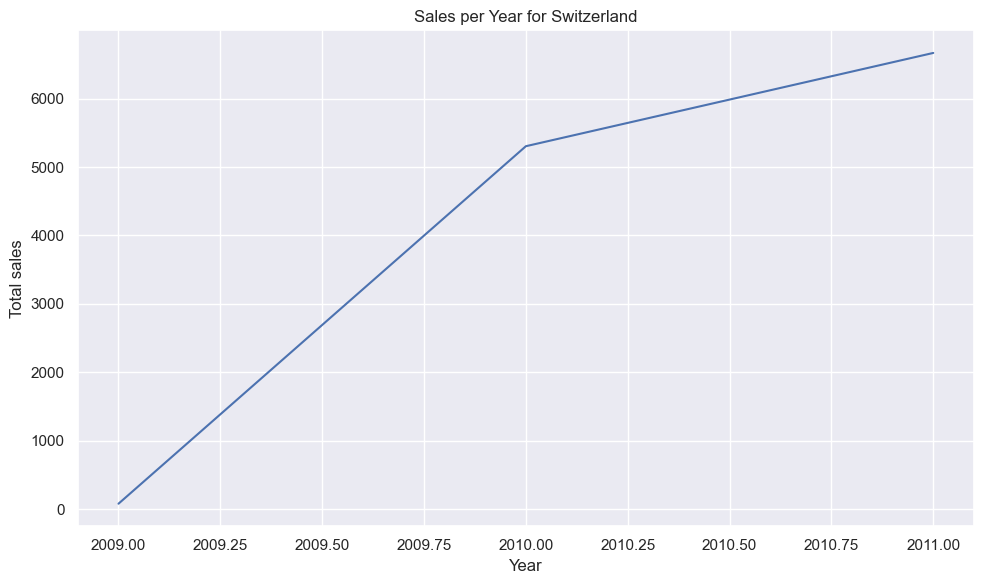

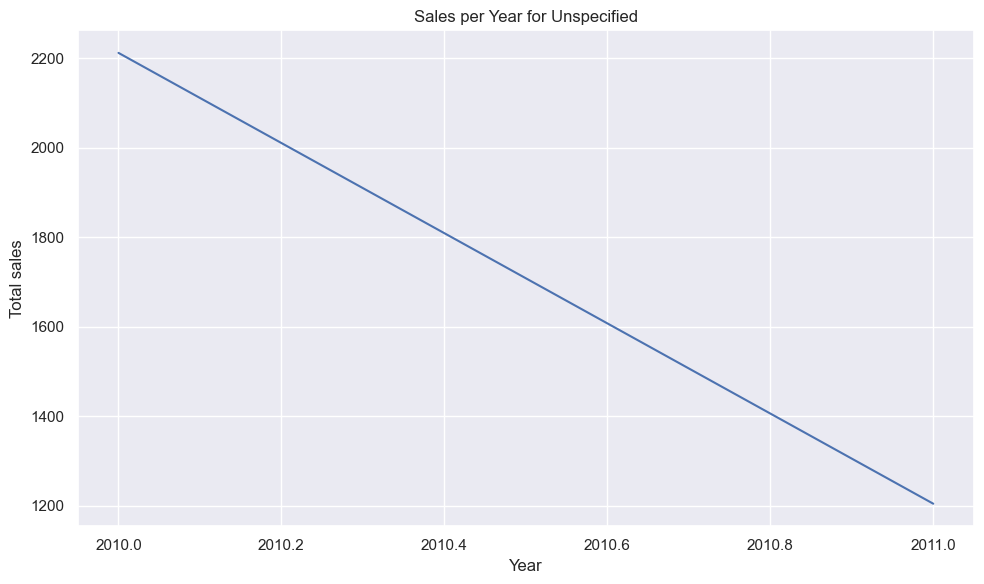

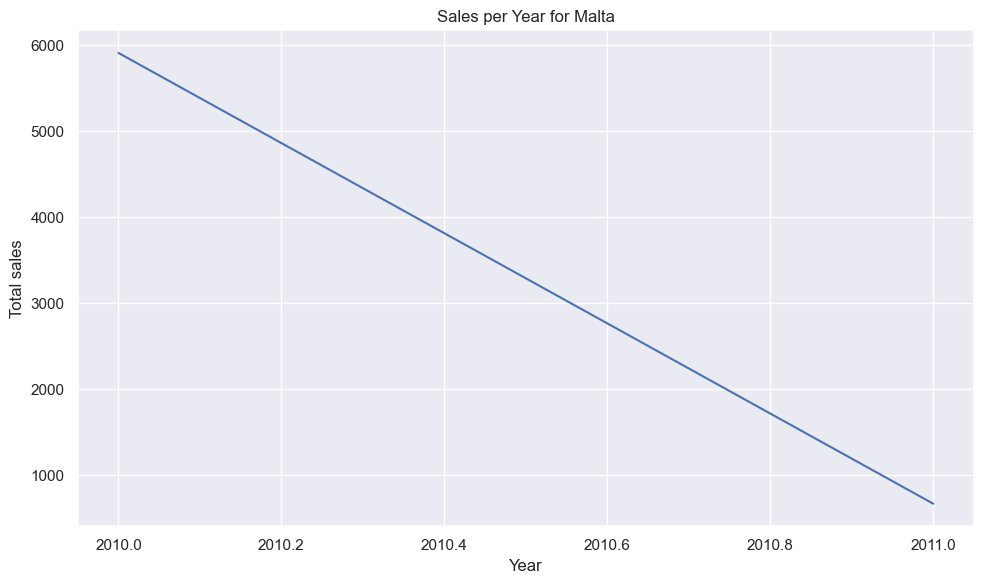

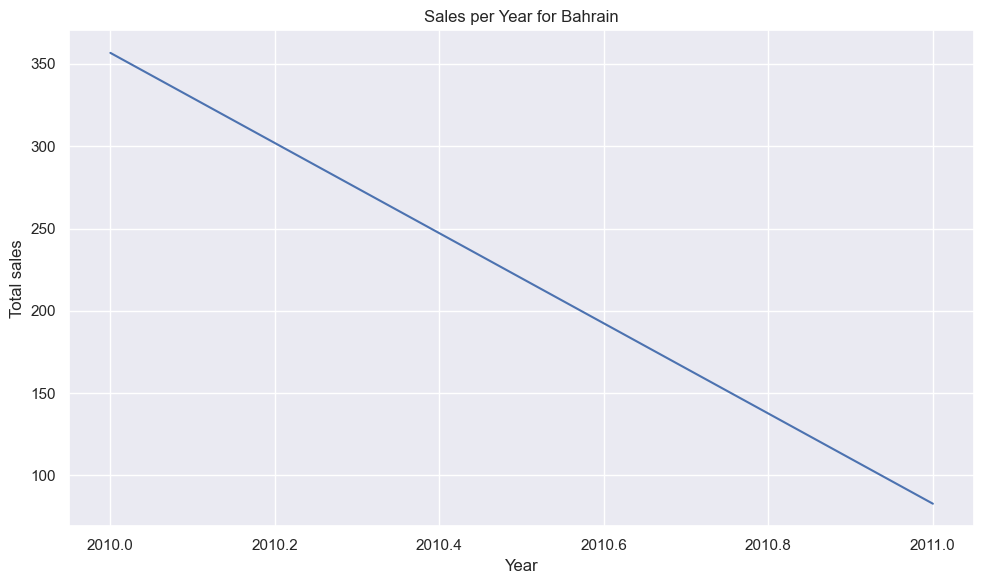

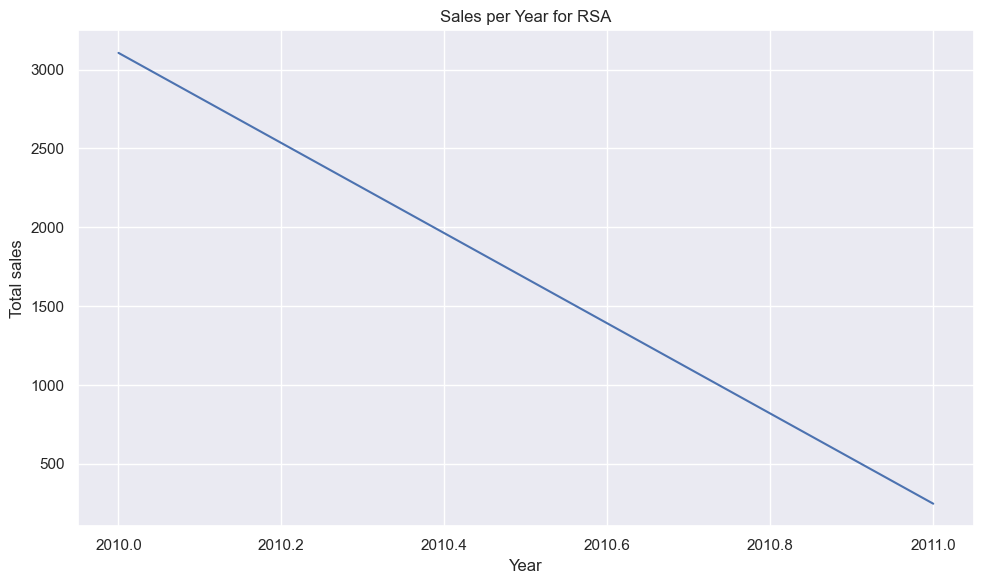

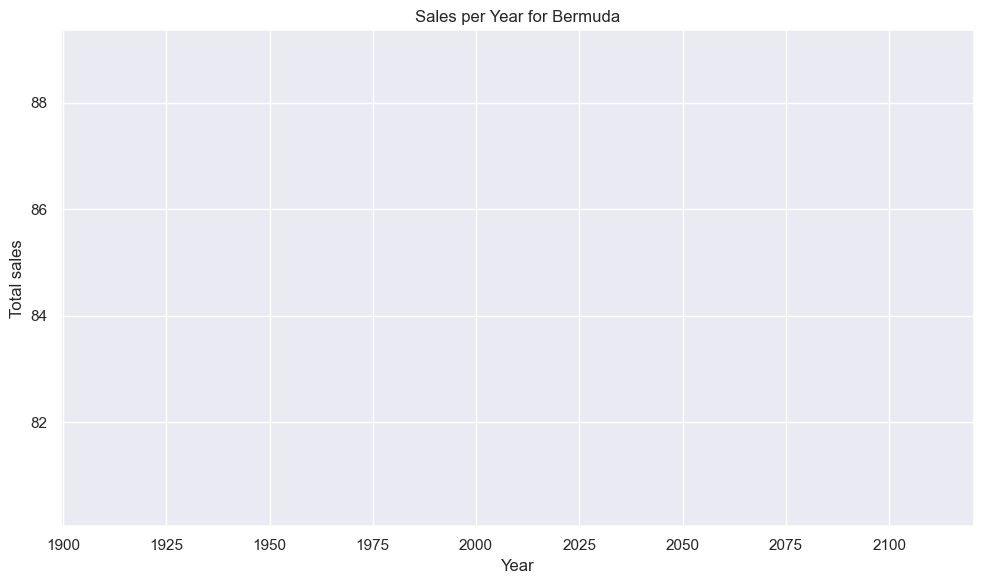

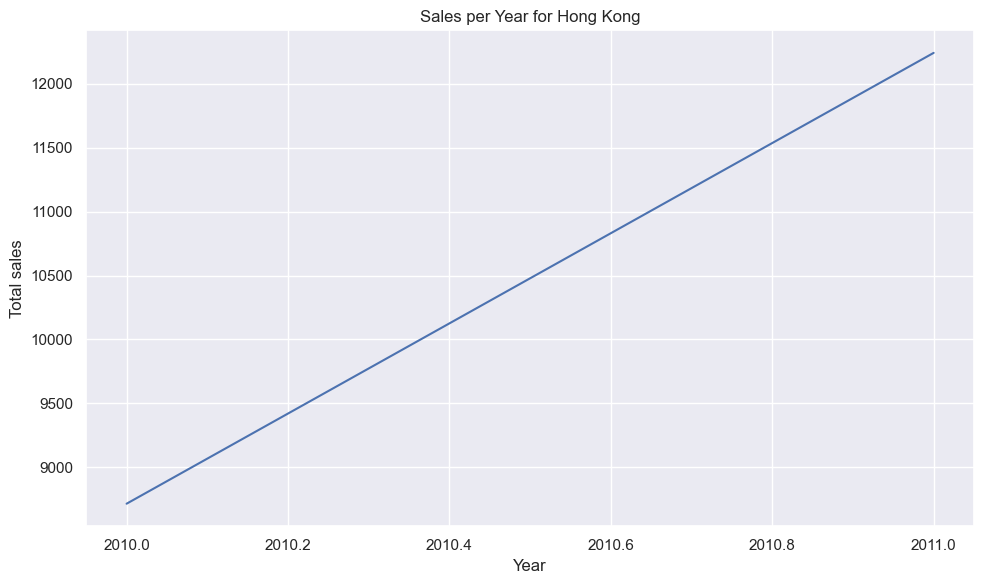

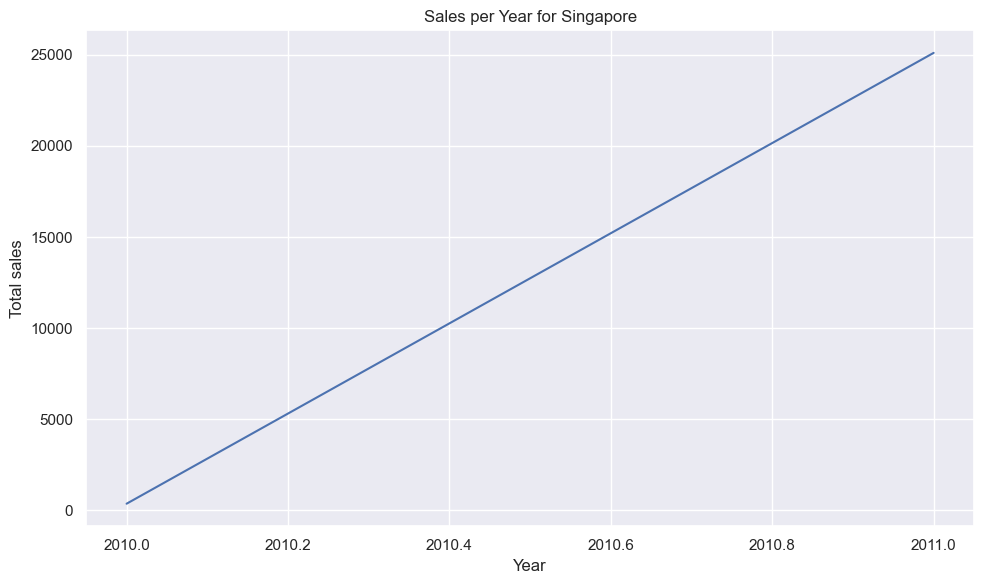

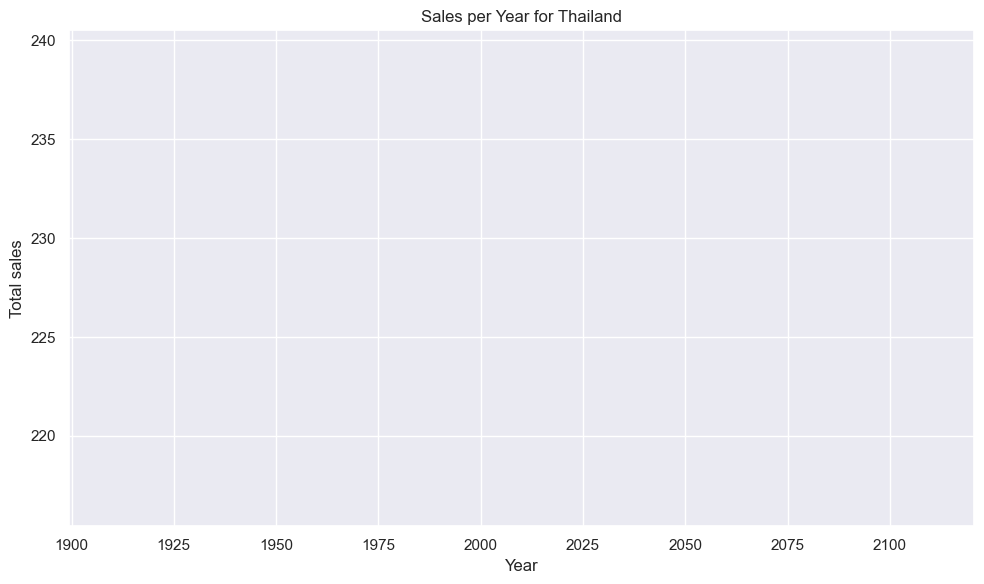

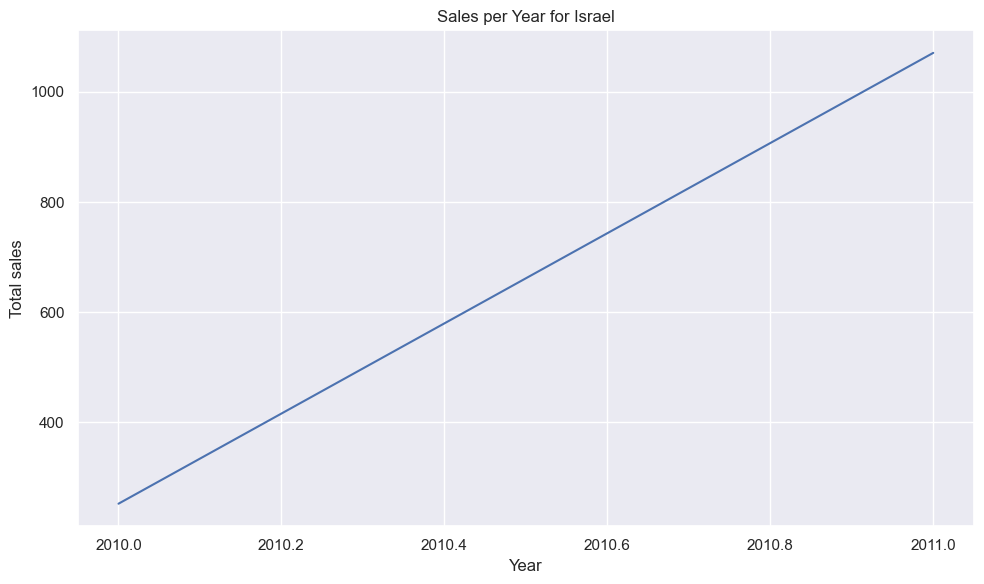

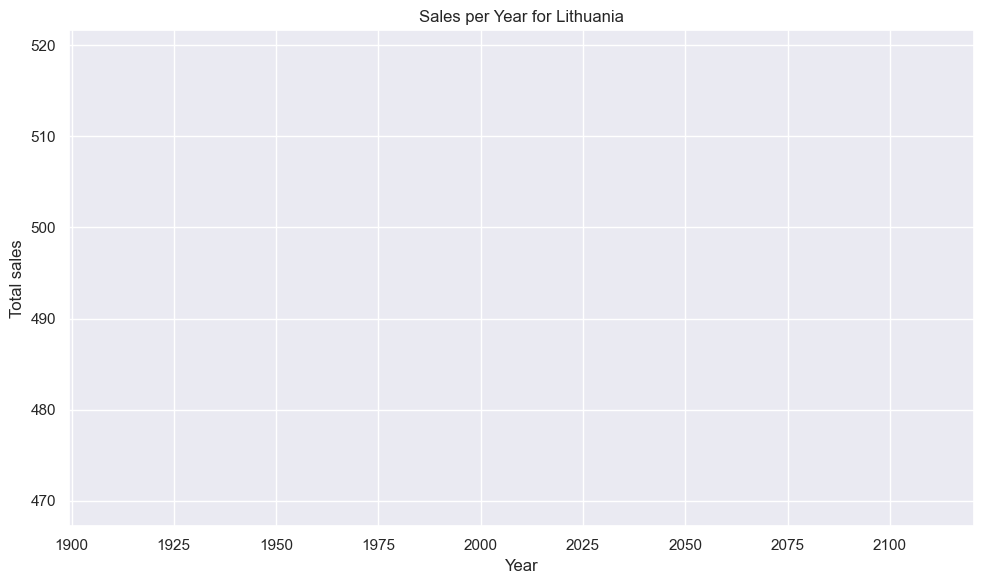

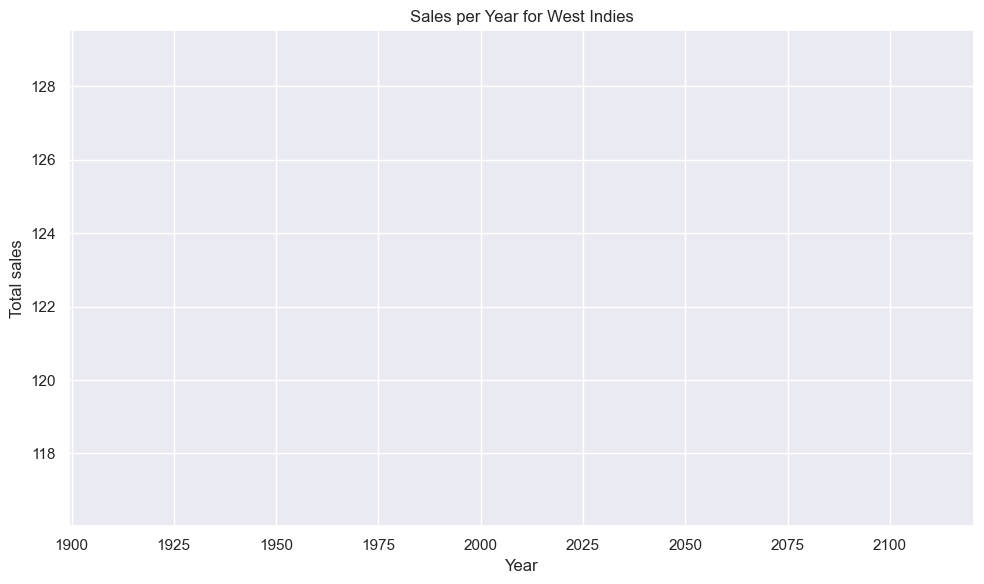

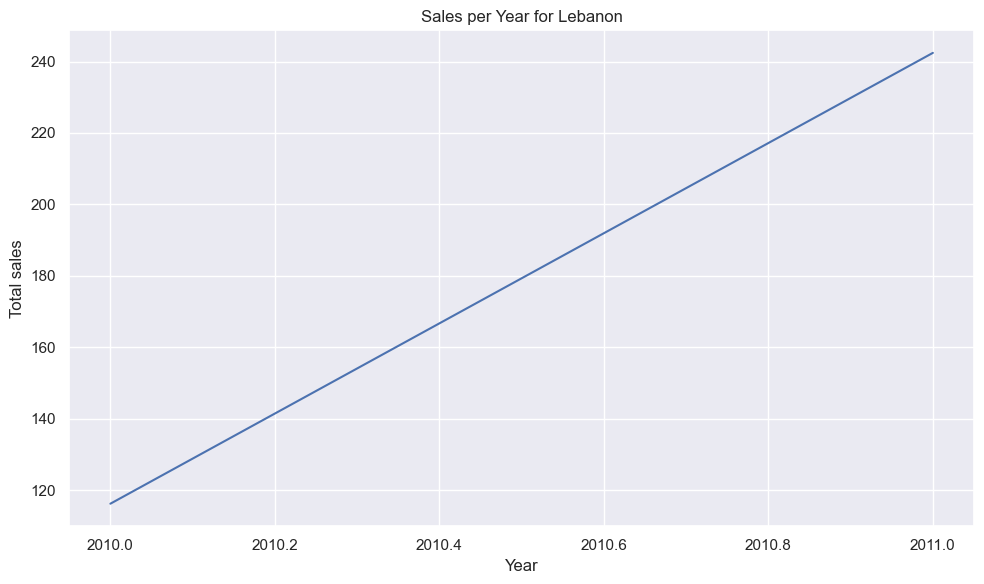

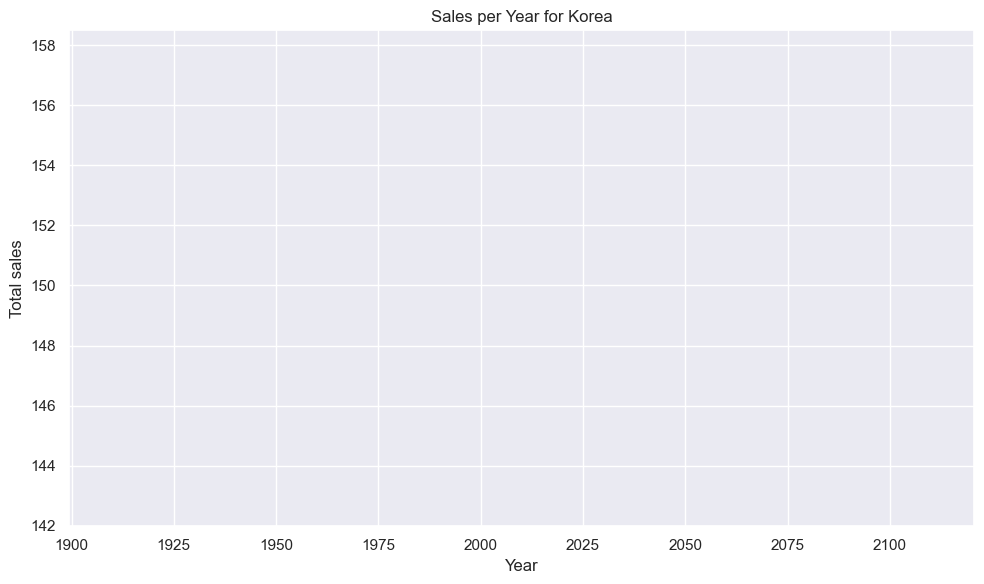

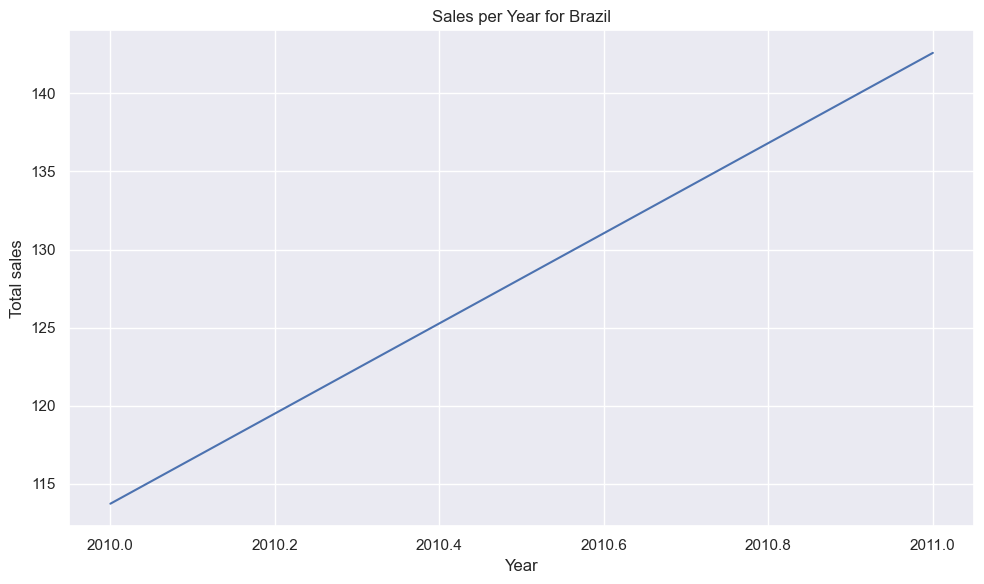

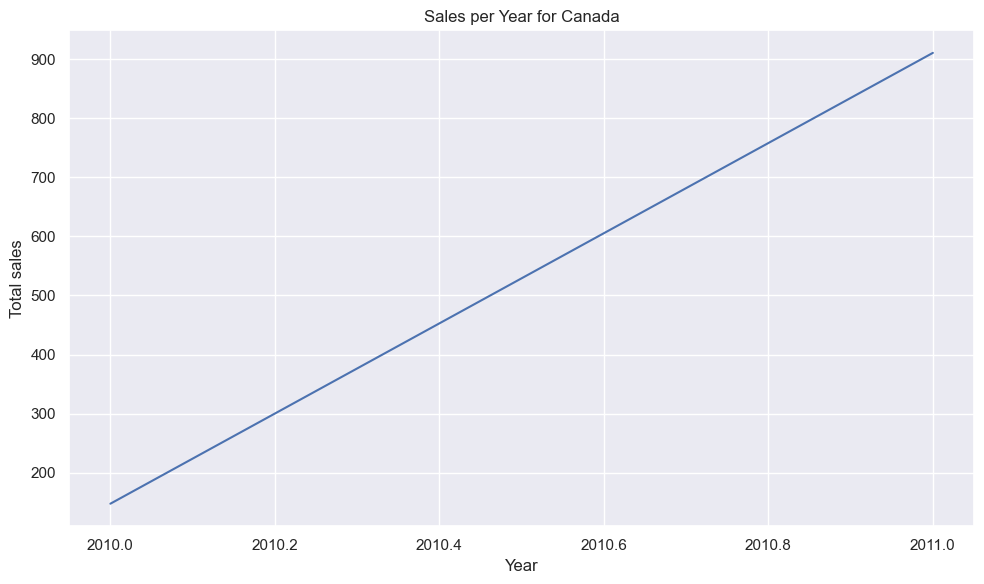

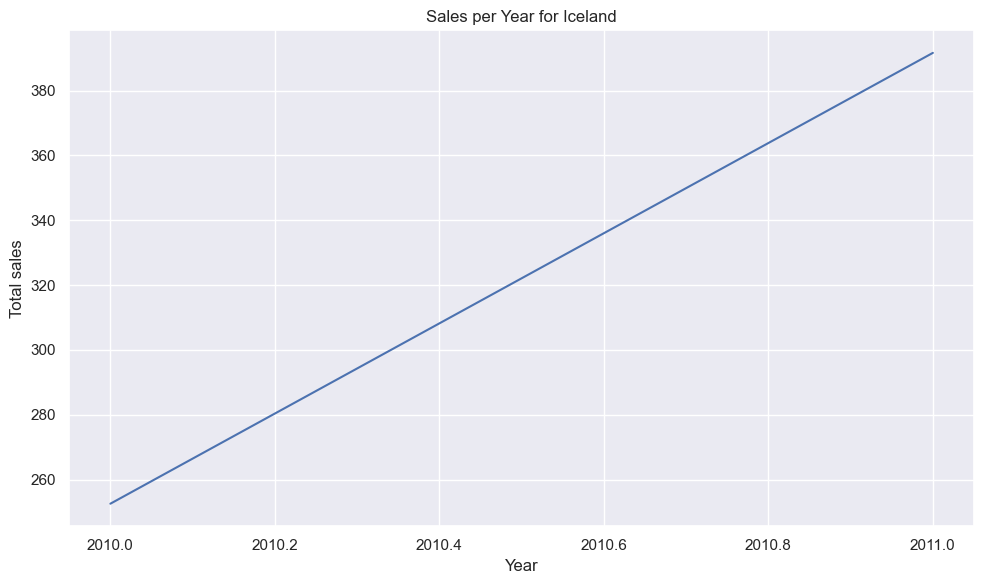

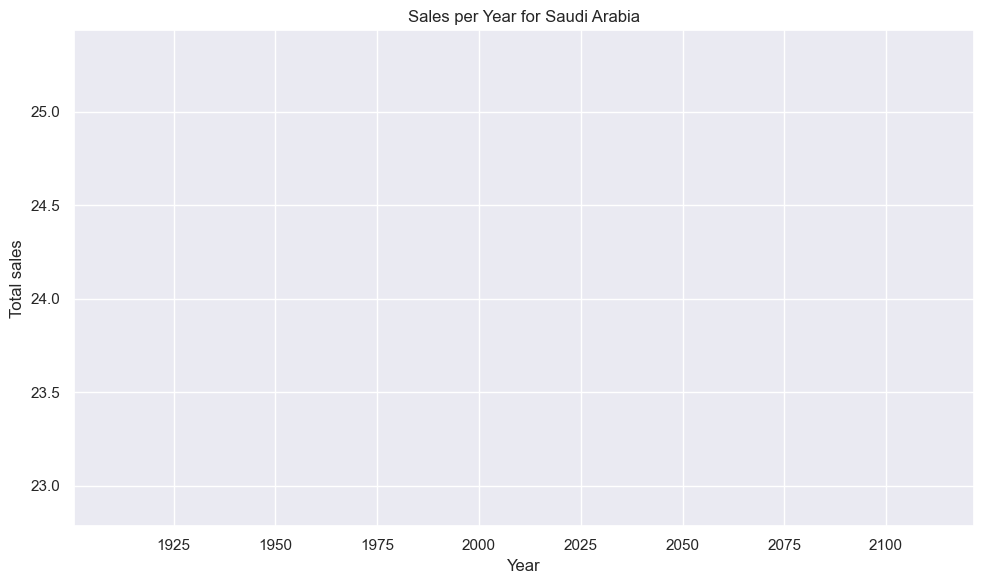

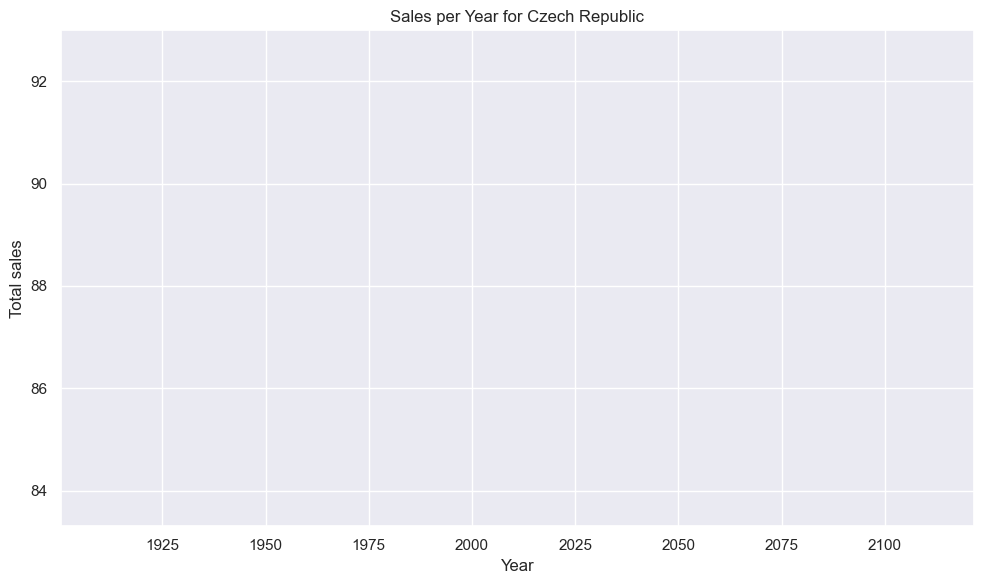

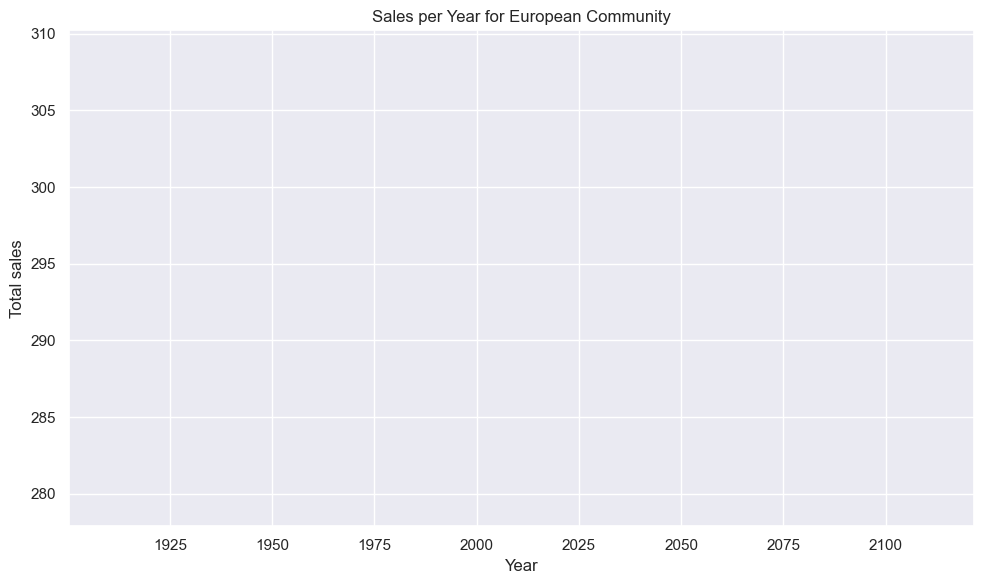

In [9]:
# Plot the graph to see the yearly trend of the sales
countries = df['Country'].unique()
for country in  countries:
    temp = df[df['Country']==country]
    temp['InvoiceDate'] = pd.to_datetime(temp['InvoiceDate'])
    temp['Year'] = temp['InvoiceDate'].dt.year
    temp = temp.groupby('Year')['Price'].sum().reset_index()
    
    plt.figure(figsize=(10,6))
    plt.plot(temp['Year'],temp['Price'])
    plt.xlabel('Year')
    plt.ylabel('Total sales')
    plt.title(f'Sales per Year for {country}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [10]:
# Filter data with country 'France'
dataset = df[df['Country']=='France']

In [11]:
# Check for the basic information about the dataset
dataset.info()

# There are total 14330 observation and 8 features in dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14330 entries, 71 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Invoice      14330 non-null  object        
 1   StockCode    14330 non-null  object        
 2   Description  14330 non-null  object        
 3   Quantity     14330 non-null  int64         
 4   InvoiceDate  14330 non-null  datetime64[ns]
 5   Price        14330 non-null  float64       
 6   Customer ID  14202 non-null  float64       
 7   Country      14330 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 1007.6+ KB


# Preprocessing

In [12]:
# Check for the null values
dataset.isnull().sum()

# There are 128 missing values in Customer ID.

Invoice          0
StockCode        0
Description      0
Quantity         0
InvoiceDate      0
Price            0
Customer ID    128
Country          0
dtype: int64

In [13]:
# The customer id is not required for the model building. Hence, its okay to drop the column
dataset.drop('Customer ID',axis=1,inplace=True)

In [14]:
# Check the invoice column for any discrepancies
set(dataset['Invoice'].to_list())

{489439,
 489557,
 489883,
 490139,
 490152,
 490458,
 490684,
 490959,
 491698,
 491710,
 491715,
 492830,
 492944,
 493863,
 493924,
 493950,
 493964,
 494280,
 494351,
 494873,
 494897,
 494899,
 495725,
 495745,
 496325,
 496616,
 496916,
 497201,
 497360,
 497376,
 497377,
 497391,
 497394,
 497601,
 497603,
 497606,
 497612,
 497662,
 497798,
 498768,
 498890,
 499223,
 499517,
 499681,
 499777,
 499982,
 499985,
 500121,
 500176,
 500582,
 500653,
 501042,
 501114,
 501284,
 501663,
 502288,
 502467,
 502636,
 503503,
 503810,
 504094,
 504096,
 504477,
 504478,
 504709,
 505314,
 505555,
 506254,
 506267,
 507051,
 507058,
 507122,
 507130,
 507156,
 507252,
 507315,
 507446,
 507697,
 508062,
 508097,
 508502,
 509284,
 509850,
 509985,
 510348,
 510451,
 510651,
 510660,
 510668,
 510683,
 510782,
 510824,
 510966,
 511096,
 511547,
 511703,
 511825,
 511855,
 512171,
 512276,
 512744,
 513188,
 513334,
 513809,
 513820,
 513941,
 513971,
 514165,
 514219,
 514529,
 514809,
 

In [15]:
# Convert the Invoice value to string and filter all the invoice number with reference C.

dataset['Invoice'] = dataset['Invoice'].astype('str')
dataset[dataset['Invoice'].str.contains('C')]

# These are the return made by the customer. All the quantities are mentioned in negatives

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Country
734,C489534,35832,WOOLLY HAT SOCK GLOVE ADVENT STRING,-1,2009-12-01 12:09:00,5.95,France
3451,C489685,POST,POSTAGE,-1,2009-12-02 10:28:00,18.00,France
3452,C489685,21843,RETRO SPOT CAKE STAND,-1,2009-12-02 10:28:00,10.95,France
9153,C490120,POST,POSTAGE,-2,2009-12-03 17:52:00,18.00,France
9154,C490120,21092,SET/6 STRAWBERRY PAPER PLATES,-12,2009-12-03 17:52:00,0.85,France
...,...,...,...,...,...,...,...
1045603,C580263,21934,SKULL SHOULDER BAG,-10,2011-12-02 12:43:00,1.65,France
1045604,C580263,21872,GLAMOROUS MUG,-12,2011-12-02 12:43:00,1.06,France
1063031,C581316,23020,GLASS SONGBIRD STORAGE JAR,-1,2011-12-08 11:46:00,12.50,France
1063032,C581316,21531,RED RETROSPOT SUGAR JAM BOWL,-1,2011-12-08 11:46:00,2.55,France


In [16]:
# Dropping the products which were returned by the customer
dataset = dataset[~dataset['Invoice'].str.contains('C')]

In [17]:
# Replacing the unwanted space and pre-processing the text in Description column to avoid any duplicates
dataset['Description'] = dataset['Description'].str.strip()
dataset['Description'] = dataset['Description'].str.upper()

In [18]:
# Dropping the Postage and other irrelevant observations
dataset = dataset[~dataset['StockCode'].isin(['POST','C2','M', 'ADJUST'])]

C:\Users\91866\anaconda\lib\site-packages\pandas\core\algorithms.py:517: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type(


In [19]:
# Using the groupby function to consolidate the products at invoice level
dataset = dataset[['Invoice','Description']]
basket = dataset.groupby(['Invoice'])['Description'].apply(list).reset_index(name='items')

# Association Rule Mining

Association rule mining is a type of unsupervised machine learning that identifies interesting associations and relationships among large sets of data items. These rules demonstrate how frequently an itemset occurs in a transaction. This process is also referred to as market basket analysis.

Association rule mining operates on the concept of IF and ELSE statements.

In this context, the 'if' element is termed the antecedent, and the 'then' statement is known as the consequent. The relationship between two elements signifies that if a customer buys item A, they might also buy item B, which is termed as Single cardinality. However, as the customer purchases more items (A, B) and there's a need to determine if the customer will buy item C, the cardinality increases, resulting in numerous combinations.

To quantify the associations between thousands of data items, various metrics are employed:

* Support:
The support of an itemset X is the frequency of occurrence of the itemset X within the dataset. It helps filter out items that are bought less frequently.

* Confidence:
Confidence informs us about the frequency of occurrence of two products (A & B) together, given that A has occurred.

* Lift:
Lift is a metric that indicates whether a customer will buy a product given that they've bought product A.

#### The Apriori algorithm utilizes frequent itemsets to generate association rules. It is based on the concept that a subset of a frequent itemset must also be a frequent itemset.

So, what is a frequent itemset?
A frequent itemset is an itemset whose support value exceeds a certain threshold.

In [20]:
te = TransactionEncoder()
te_array = te.fit(basket['items']).transform(basket['items'])
df = pd.DataFrame(te_array,columns=te.columns_)
df = df.astype('int')
df.head()

,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE POSY,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE RED SPOTTY,12 PENCILS SMALL TUBE SKULL,...,YELLOW RED FLOWER PIGGY BANK,YELLOW SHARK HELICOPTER,YOU'RE CONFUSING ME METAL SIGN,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
frequent_itemsets = apriori(df,min_support=0.05,use_colnames=True)
rules = association_rules(frequent_itemsets,metric='lift',min_threshold=1)
rules.sort_values(by='lift',ascending=False)

C:\Users\91866\anaconda\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.070234,0.070234,0.058528,0.833333,11.865079,0.053596,5.578595,0.984892
3,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.070234,0.070234,0.058528,0.833333,11.865079,0.053596,5.578595,0.984892
4,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED),0.075251,0.070234,0.056856,0.755556,10.757672,0.051571,3.803588,0.980853
5,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE PINK),0.070234,0.075251,0.056856,0.809524,10.757672,0.051571,4.854933,0.975561
1,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.075251,0.070234,0.055184,0.733333,10.441270,0.049899,3.486622,0.977807
...,...,...,...,...,...,...,...,...,...,...
30,(PLASTERS IN TIN CIRCUS PARADE),(RED TOADSTOOL LED NIGHT LIGHT),0.173913,0.220736,0.058528,0.336538,1.524621,0.020140,1.174543,0.416541
40,(PLASTERS IN TIN WOODLAND ANIMALS),(RED TOADSTOOL LED NIGHT LIGHT),0.162207,0.220736,0.053512,0.329897,1.494533,0.017707,1.162902,0.394960
41,(RED TOADSTOOL LED NIGHT LIGHT),(PLASTERS IN TIN WOODLAND ANIMALS),0.220736,0.162207,0.053512,0.242424,1.494533,0.017707,1.105886,0.424624
44,(ROUND SNACK BOXES SET OF4 WOODLAND),(RED TOADSTOOL LED NIGHT LIGHT),0.180602,0.220736,0.055184,0.305556,1.384259,0.015319,1.122140,0.338776


In [29]:
rules['support'].max() # Maximum support value is 11.87%

0.11872909698996656

In [30]:
rules['confidence'].max() # Maximum confidence value is 97%

0.9777777777777777

In [33]:
rules[(rules['support']>=0.07) &( rules['confidence']>=0.60)] 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
11,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX),0.098662,0.133779,0.075251,0.762712,5.701271,0.062052,3.650502,0.914863
23,(STRAWBERRY LUNCH BOX WITH CUTLERY),(LUNCH BOX WITH CUTLERY RETROSPOT),0.133779,0.157191,0.085284,0.637500,4.055585,0.064255,2.324991,0.869786
24,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN CIRCUS PARADE),0.133779,0.173913,0.093645,0.700000,4.025000,0.070380,2.753623,0.867623
28,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN WOODLAND ANIMALS),0.173913,0.162207,0.105351,0.605769,3.734536,0.077141,2.125133,0.886383
29,(PLASTERS IN TIN WOODLAND ANIMALS),(PLASTERS IN TIN CIRCUS PARADE),0.162207,0.173913,0.105351,0.649485,3.734536,0.077141,2.356777,0.873998
36,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN WOODLAND ANIMALS),0.133779,0.162207,0.095318,0.712500,4.392526,0.073618,2.914061,0.891621
46,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.128763,0.180602,0.080268,0.623377,3.451659,0.057013,2.175643,0.815259
51,(SET/20 RED RETROSPOT PAPER NAPKINS),(SET/6 RED SPOTTY PAPER CUPS),0.098662,0.142140,0.075251,0.762712,5.365902,0.061227,3.615265,0.902700
52,(SET/20 RED RETROSPOT PAPER NAPKINS),(SET/6 RED SPOTTY PAPER PLATES),0.098662,0.130435,0.075251,0.762712,5.847458,0.062382,3.664596,0.919728
54,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.142140,0.130435,0.118729,0.835294,6.403922,0.100189,5.279503,0.983664
